## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import squarify
import seaborn as sns
import plotly.express as px

## Importing the data set

In [2]:
df = pd.read_csv('Data\sim_av_tumour.csv', low_memory=False)
df1 = pd.read_csv('Data\sim_av_patient.csv')

## Merging the data set

In [3]:
df2 = pd.merge(df, df1)
df2

,TUMOURID,GENDER,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,SITE_ICD10_O2,SITE_ICD10R4_O2_3CHAR_FROM2013,SITE_ICD10R4_O2_FROM2013,SITE_ICDO3REV2011,SITE_ICDO3REV2011_3CHAR,...,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,VITALSTATUS,VITALSTATUSDATE,LINKNUMBER
0,10399610,1,10000001,2017-03-31,C44,C444,C44,C444,C444,C44,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101610884
1,10694862,1,10000002,2016-01-14,C44,C449,C44,C449,C449,C44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101343783
2,11938715,2,10000003,2018-12-10,C44,C442,C44,C442,C442,C44,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101560124
3,11869010,1,10000004,2018-04-05,C44,C449,C44,C449,C449,C44,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101833580
4,11037077,1,10000005,2018-04-23,C44,C446,C44,C446,C446,C44,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,100957799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995565,11016639,2,250002540,2016-06-09,D01,D012,D01,D012,C447,C44,...,L,NaN,NaN,NaN,NaN,NaN,NaN,D,2021-06-10,101223249
1995566,10099209,2,250002541,2018-01-25,C67,C679,C67,C679,C679,C67,...,A,C439,NaN,NaN,NaN,I259,4,D,2022-06-10,100870402
1995567,11425843,1,250002542,2019-07-18,C45,C450,C45,C450,C384,C38,...,A,C66,NaN,NaN,"I259,J449,I10",C66,2,D,2019-09-25,100803641
1995568,10952466,2,250002543,2016-10-18,C49,C495,C49,C495,C675,C67,...,A,C809,NaN,NaN,I259,K559,2,D,2020-05-24,100880144


In [4]:
patient_id_counts = df2['PATIENTID'].value_counts()
duplicate_summary = patient_id_counts.value_counts().sort_index()
duplicate_summary

1    1755702
2     108402
3       6980
4        483
5         36
6          2
Name: PATIENTID, dtype: int64

In [5]:
patient_ids_occuring_five_times = patient_id_counts[patient_id_counts == 5].index.tolist()
patient_ids_occuring_five_times

[200001809,
 200004371,
 140001359,
 50151994,
 50143823,
 80069165,
 80070743,
 110037196,
 20088152,
 10262301,
 120030810,
 110027606,
 110026549,
 20039175,
 50110492,
 110026149,
 20048721,
 20056056,
 10310054,
 80022797,
 50145857,
 50142836,
 130017670,
 30138634,
 20024555,
 80065643,
 60073411,
 200001210,
 50097089,
 50017515,
 50143611,
 50154377,
 40053071,
 50144962,
 50099435,
 20047084]

In [6]:
patient_id_to_locate = 200001809
matching_rows = df2[df2['PATIENTID'] == patient_id_to_locate]
matching_rows

,TUMOURID,GENDER,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,SITE_ICD10_O2,SITE_ICD10R4_O2_3CHAR_FROM2013,SITE_ICD10R4_O2_FROM2013,SITE_ICDO3REV2011,SITE_ICDO3REV2011_3CHAR,...,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,VITALSTATUS,VITALSTATUSDATE,LINKNUMBER
1974222,10045116,2,200001809,2018-05-08,C43,C435,C43,C435,C445,C44,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101608452
1974223,11639691,2,200001809,2018-08-05,C44,C449,C44,C449,C449,C44,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101608452
1974224,10533106,2,200001809,2018-11-20,C54,C541,C54,C541,C445,C44,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101608452
1974225,10049580,2,200001809,2018-12-19,C43,C436,C43,C436,C447,C44,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101608452
1974226,11617457,2,200001809,2019-01-15,C43,C435,C43,C435,C320,C32,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101608452


In [7]:
Lookup = pd.read_excel(r'Documents\all_z_lookup_tables.xlsx',sheet_name='zgender')
Lookup

,Code,Description
0,1,Male
1,2,Female
2,9,Indeterminate (Unable to be classified as eith...
3,X,Not Known (PERSON STATED GENDER CODE not recor...


In [8]:
merged_df = pd.merge(df2, Lookup, left_on='GENDER', right_on='Code', how='left')
merged_df['GENDER'] = merged_df['Description']
merged_df.drop(['Code', 'Description'], axis=1, inplace=True)
merged_df

,TUMOURID,GENDER,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,SITE_ICD10_O2,SITE_ICD10R4_O2_3CHAR_FROM2013,SITE_ICD10R4_O2_FROM2013,SITE_ICDO3REV2011,SITE_ICDO3REV2011_3CHAR,...,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,VITALSTATUS,VITALSTATUSDATE,LINKNUMBER
0,10399610,Male,10000001,2017-03-31,C44,C444,C44,C444,C444,C44,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101610884
1,10694862,Male,10000002,2016-01-14,C44,C449,C44,C449,C449,C44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101343783
2,11938715,Female,10000003,2018-12-10,C44,C442,C44,C442,C442,C44,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101560124
3,11869010,Male,10000004,2018-04-05,C44,C449,C44,C449,C449,C44,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101833580
4,11037077,Male,10000005,2018-04-23,C44,C446,C44,C446,C446,C44,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,100957799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995565,11016639,Female,250002540,2016-06-09,D01,D012,D01,D012,C447,C44,...,L,NaN,NaN,NaN,NaN,NaN,NaN,D,2021-06-10,101223249
1995566,10099209,Female,250002541,2018-01-25,C67,C679,C67,C679,C679,C67,...,A,C439,NaN,NaN,NaN,I259,4,D,2022-06-10,100870402
1995567,11425843,Male,250002542,2019-07-18,C45,C450,C45,C450,C384,C38,...,A,C66,NaN,NaN,"I259,J449,I10",C66,2,D,2019-09-25,100803641
1995568,10952466,Female,250002543,2016-10-18,C49,C495,C49,C495,C675,C67,...,A,C809,NaN,NaN,I259,K559,2,D,2020-05-24,100880144


In [9]:
ICD = pd.read_excel(r'downloaded_dataset\icd10_lookup.xlsx')
ICD

,Code,Description
0,A00,Cholera
1,A000,"Cholera due to Vibrio cholerae 01, biovar chol..."
2,A001,"Cholera due to Vibrio cholerae 01, biovar eltor"
3,A009,"Cholera, unspecified"
4,A01,Typhoid and paratyphoid fevers
...,...,...
79497,Z992,Dependence on renal dialysis
79498,Z993,Dependence on wheelchair
79499,Z998,Dependence on other enabling machines and devices
79500,Z9981,Dependence on supplemental oxygen


In [10]:
merged_df1 = pd.merge(merged_df, ICD, left_on='SITE_ICD10_O2_3CHAR', right_on='Code', how='left')
merged_df1['SITE_ICD10_O2_3CHAR'] = merged_df1['Description']
merged_df1.drop(['Code', 'Description'], axis=1, inplace=True)
merged_df1

,TUMOURID,GENDER,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,SITE_ICD10_O2,SITE_ICD10R4_O2_3CHAR_FROM2013,SITE_ICD10R4_O2_FROM2013,SITE_ICDO3REV2011,SITE_ICDO3REV2011_3CHAR,...,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,VITALSTATUS,VITALSTATUSDATE,LINKNUMBER
0,10399610,Male,10000001,2017-03-31,Other and unspecified malignant neoplasm of skin,C444,C44,C444,C444,C44,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101610884
1,10694862,Male,10000002,2016-01-14,Other and unspecified malignant neoplasm of skin,C449,C44,C449,C449,C44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101343783
2,11938715,Female,10000003,2018-12-10,Other and unspecified malignant neoplasm of skin,C442,C44,C442,C442,C44,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101560124
3,11869010,Male,10000004,2018-04-05,Other and unspecified malignant neoplasm of skin,C449,C44,C449,C449,C44,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101833580
4,11037077,Male,10000005,2018-04-23,Other and unspecified malignant neoplasm of skin,C446,C44,C446,C446,C44,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,100957799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995565,11016639,Female,250002540,2016-06-09,Carcinoma in situ of other and unspecified dig...,D012,D01,D012,C447,C44,...,L,NaN,NaN,NaN,NaN,NaN,NaN,D,2021-06-10,101223249
1995566,10099209,Female,250002541,2018-01-25,Malignant neoplasm of bladder,C679,C67,C679,C679,C67,...,A,C439,NaN,NaN,NaN,I259,4,D,2022-06-10,100870402
1995567,11425843,Male,250002542,2019-07-18,Mesothelioma,C450,C45,C450,C384,C38,...,A,C66,NaN,NaN,"I259,J449,I10",C66,2,D,2019-09-25,100803641
1995568,10952466,Female,250002543,2016-10-18,Malignant neoplasm of other connective and sof...,C495,C49,C495,C675,C67,...,A,C809,NaN,NaN,I259,K559,2,D,2020-05-24,100880144


In [11]:
merged_df2 = pd.merge(merged_df1, ICD, left_on='SITE_ICD10_O2', right_on='Code', how='left')
merged_df2['SITE_ICD10_O2'] = merged_df2['Description']
merged_df2.drop(['Code', 'Description'], axis=1, inplace=True)
merged_df2

,TUMOURID,GENDER,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,SITE_ICD10_O2,SITE_ICD10R4_O2_3CHAR_FROM2013,SITE_ICD10R4_O2_FROM2013,SITE_ICDO3REV2011,SITE_ICDO3REV2011_3CHAR,...,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,VITALSTATUS,VITALSTATUSDATE,LINKNUMBER
0,10399610,Male,10000001,2017-03-31,Other and unspecified malignant neoplasm of skin,Other and unsp malignant neoplasm of skin of s...,C44,C444,C444,C44,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101610884
1,10694862,Male,10000002,2016-01-14,Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...",C44,C449,C449,C44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101343783
2,11938715,Female,10000003,2018-12-10,Other and unspecified malignant neoplasm of skin,Oth and unsp malig neoplasm skin/ ear and extr...,C44,C442,C442,C44,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101560124
3,11869010,Male,10000004,2018-04-05,Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...",C44,C449,C449,C44,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101833580
4,11037077,Male,10000005,2018-04-23,Other and unspecified malignant neoplasm of skin,"Oth and unsp malig neoplasm skin/ upper limb, ...",C44,C446,C446,C44,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,100957799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995565,11016639,Female,250002540,2016-06-09,Carcinoma in situ of other and unspecified dig...,Carcinoma in situ of rectum,D01,D012,C447,C44,...,L,NaN,NaN,NaN,NaN,NaN,NaN,D,2021-06-10,101223249
1995566,10099209,Female,250002541,2018-01-25,Malignant neoplasm of bladder,"Malignant neoplasm of bladder, unspecified",C67,C679,C679,C67,...,A,C439,NaN,NaN,NaN,I259,4,D,2022-06-10,100870402
1995567,11425843,Male,250002542,2019-07-18,Mesothelioma,Mesothelioma of pleura,C45,C450,C384,C38,...,A,C66,NaN,NaN,"I259,J449,I10",C66,2,D,2019-09-25,100803641
1995568,10952466,Female,250002543,2016-10-18,Malignant neoplasm of other connective and sof...,Malignant neoplasm of connective and soft tiss...,C49,C495,C675,C67,...,A,C809,NaN,NaN,I259,K559,2,D,2020-05-24,100880144


In [12]:
merged_df3 = pd.merge(merged_df2, ICD, left_on='SITE_ICD10R4_O2_3CHAR_FROM2013', right_on='Code', how='left')
merged_df3['SITE_ICD10R4_O2_3CHAR_FROM2013'] = merged_df3['Description']
merged_df3.drop(['Code', 'Description'], axis=1, inplace=True)
merged_df3

,TUMOURID,GENDER,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,SITE_ICD10_O2,SITE_ICD10R4_O2_3CHAR_FROM2013,SITE_ICD10R4_O2_FROM2013,SITE_ICDO3REV2011,SITE_ICDO3REV2011_3CHAR,...,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,VITALSTATUS,VITALSTATUSDATE,LINKNUMBER
0,10399610,Male,10000001,2017-03-31,Other and unspecified malignant neoplasm of skin,Other and unsp malignant neoplasm of skin of s...,Other and unspecified malignant neoplasm of skin,C444,C444,C44,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101610884
1,10694862,Male,10000002,2016-01-14,Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,C449,C449,C44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101343783
2,11938715,Female,10000003,2018-12-10,Other and unspecified malignant neoplasm of skin,Oth and unsp malig neoplasm skin/ ear and extr...,Other and unspecified malignant neoplasm of skin,C442,C442,C44,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101560124
3,11869010,Male,10000004,2018-04-05,Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,C449,C449,C44,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101833580
4,11037077,Male,10000005,2018-04-23,Other and unspecified malignant neoplasm of skin,"Oth and unsp malig neoplasm skin/ upper limb, ...",Other and unspecified malignant neoplasm of skin,C446,C446,C44,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,100957799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995565,11016639,Female,250002540,2016-06-09,Carcinoma in situ of other and unspecified dig...,Carcinoma in situ of rectum,Carcinoma in situ of other and unspecified dig...,D012,C447,C44,...,L,NaN,NaN,NaN,NaN,NaN,NaN,D,2021-06-10,101223249
1995566,10099209,Female,250002541,2018-01-25,Malignant neoplasm of bladder,"Malignant neoplasm of bladder, unspecified",Malignant neoplasm of bladder,C679,C679,C67,...,A,C439,NaN,NaN,NaN,I259,4,D,2022-06-10,100870402
1995567,11425843,Male,250002542,2019-07-18,Mesothelioma,Mesothelioma of pleura,Mesothelioma,C450,C384,C38,...,A,C66,NaN,NaN,"I259,J449,I10",C66,2,D,2019-09-25,100803641
1995568,10952466,Female,250002543,2016-10-18,Malignant neoplasm of other connective and sof...,Malignant neoplasm of connective and soft tiss...,Malignant neoplasm of other connective and sof...,C495,C675,C67,...,A,C809,NaN,NaN,I259,K559,2,D,2020-05-24,100880144


In [13]:
merged_df4 = pd.merge(merged_df3, ICD, left_on='SITE_ICD10R4_O2_FROM2013', right_on='Code', how='left')
merged_df4['SITE_ICD10R4_O2_FROM2013'] = merged_df4['Description']
merged_df4.drop(['Code', 'Description'], axis=1, inplace=True)
merged_df4

,TUMOURID,GENDER,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,SITE_ICD10_O2,SITE_ICD10R4_O2_3CHAR_FROM2013,SITE_ICD10R4_O2_FROM2013,SITE_ICDO3REV2011,SITE_ICDO3REV2011_3CHAR,...,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,VITALSTATUS,VITALSTATUSDATE,LINKNUMBER
0,10399610,Male,10000001,2017-03-31,Other and unspecified malignant neoplasm of skin,Other and unsp malignant neoplasm of skin of s...,Other and unspecified malignant neoplasm of skin,Other and unsp malignant neoplasm of skin of s...,C444,C44,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101610884
1,10694862,Male,10000002,2016-01-14,Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...",C449,C44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101343783
2,11938715,Female,10000003,2018-12-10,Other and unspecified malignant neoplasm of skin,Oth and unsp malig neoplasm skin/ ear and extr...,Other and unspecified malignant neoplasm of skin,Oth and unsp malig neoplasm skin/ ear and extr...,C442,C44,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101560124
3,11869010,Male,10000004,2018-04-05,Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...",C449,C44,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101833580
4,11037077,Male,10000005,2018-04-23,Other and unspecified malignant neoplasm of skin,"Oth and unsp malig neoplasm skin/ upper limb, ...",Other and unspecified malignant neoplasm of skin,"Oth and unsp malig neoplasm skin/ upper limb, ...",C446,C44,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,100957799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995565,11016639,Female,250002540,2016-06-09,Carcinoma in situ of other and unspecified dig...,Carcinoma in situ of rectum,Carcinoma in situ of other and unspecified dig...,Carcinoma in situ of rectum,C447,C44,...,L,NaN,NaN,NaN,NaN,NaN,NaN,D,2021-06-10,101223249
1995566,10099209,Female,250002541,2018-01-25,Malignant neoplasm of bladder,"Malignant neoplasm of bladder, unspecified",Malignant neoplasm of bladder,"Malignant neoplasm of bladder, unspecified",C679,C67,...,A,C439,NaN,NaN,NaN,I259,4,D,2022-06-10,100870402
1995567,11425843,Male,250002542,2019-07-18,Mesothelioma,Mesothelioma of pleura,Mesothelioma,Mesothelioma of pleura,C384,C38,...,A,C66,NaN,NaN,"I259,J449,I10",C66,2,D,2019-09-25,100803641
1995568,10952466,Female,250002543,2016-10-18,Malignant neoplasm of other connective and sof...,Malignant neoplasm of connective and soft tiss...,Malignant neoplasm of other connective and sof...,Malignant neoplasm of connective and soft tiss...,C675,C67,...,A,C809,NaN,NaN,I259,K559,2,D,2020-05-24,100880144


In [14]:
merged_df5 = pd.merge(merged_df4, ICD, left_on='SITE_ICDO3REV2011', right_on='Code', how='left')
merged_df5['SITE_ICDO3REV2011'] = merged_df5['Description']
merged_df5.drop(['Code', 'Description'], axis=1, inplace=True)
merged_df5

,TUMOURID,GENDER,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,SITE_ICD10_O2,SITE_ICD10R4_O2_3CHAR_FROM2013,SITE_ICD10R4_O2_FROM2013,SITE_ICDO3REV2011,SITE_ICDO3REV2011_3CHAR,...,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,VITALSTATUS,VITALSTATUSDATE,LINKNUMBER
0,10399610,Male,10000001,2017-03-31,Other and unspecified malignant neoplasm of skin,Other and unsp malignant neoplasm of skin of s...,Other and unspecified malignant neoplasm of skin,Other and unsp malignant neoplasm of skin of s...,Other and unsp malignant neoplasm of skin of s...,C44,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101610884
1,10694862,Male,10000002,2016-01-14,Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...","Other and unsp malignant neoplasm of skin, uns...",C44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101343783
2,11938715,Female,10000003,2018-12-10,Other and unspecified malignant neoplasm of skin,Oth and unsp malig neoplasm skin/ ear and extr...,Other and unspecified malignant neoplasm of skin,Oth and unsp malig neoplasm skin/ ear and extr...,Oth and unsp malig neoplasm skin/ ear and extr...,C44,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101560124
3,11869010,Male,10000004,2018-04-05,Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...","Other and unsp malignant neoplasm of skin, uns...",C44,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101833580
4,11037077,Male,10000005,2018-04-23,Other and unspecified malignant neoplasm of skin,"Oth and unsp malig neoplasm skin/ upper limb, ...",Other and unspecified malignant neoplasm of skin,"Oth and unsp malig neoplasm skin/ upper limb, ...","Oth and unsp malig neoplasm skin/ upper limb, ...",C44,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,100957799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995565,11016639,Female,250002540,2016-06-09,Carcinoma in situ of other and unspecified dig...,Carcinoma in situ of rectum,Carcinoma in situ of other and unspecified dig...,Carcinoma in situ of rectum,Oth and unsp malignant neoplasm skin/ lower li...,C44,...,L,NaN,NaN,NaN,NaN,NaN,NaN,D,2021-06-10,101223249
1995566,10099209,Female,250002541,2018-01-25,Malignant neoplasm of bladder,"Malignant neoplasm of bladder, unspecified",Malignant neoplasm of bladder,"Malignant neoplasm of bladder, unspecified","Malignant neoplasm of bladder, unspecified",C67,...,A,C439,NaN,NaN,NaN,I259,4,D,2022-06-10,100870402
1995567,11425843,Male,250002542,2019-07-18,Mesothelioma,Mesothelioma of pleura,Mesothelioma,Mesothelioma of pleura,Malignant neoplasm of pleura,C38,...,A,C66,NaN,NaN,"I259,J449,I10",C66,2,D,2019-09-25,100803641
1995568,10952466,Female,250002543,2016-10-18,Malignant neoplasm of other connective and sof...,Malignant neoplasm of connective and soft tiss...,Malignant neoplasm of other connective and sof...,Malignant neoplasm of connective and soft tiss...,Malignant neoplasm of bladder neck,C67,...,A,C809,NaN,NaN,I259,K559,2,D,2020-05-24,100880144


In [15]:
merged_df6 = pd.merge(merged_df5, ICD, left_on='SITE_ICDO3REV2011_3CHAR', right_on='Code', how='left')
merged_df6['SITE_ICDO3REV2011_3CHAR'] = merged_df6['Description']
merged_df6.drop(['Code', 'Description'], axis=1, inplace=True)
merged_df6

,TUMOURID,GENDER,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,SITE_ICD10_O2,SITE_ICD10R4_O2_3CHAR_FROM2013,SITE_ICD10R4_O2_FROM2013,SITE_ICDO3REV2011,SITE_ICDO3REV2011_3CHAR,...,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,VITALSTATUS,VITALSTATUSDATE,LINKNUMBER
0,10399610,Male,10000001,2017-03-31,Other and unspecified malignant neoplasm of skin,Other and unsp malignant neoplasm of skin of s...,Other and unspecified malignant neoplasm of skin,Other and unsp malignant neoplasm of skin of s...,Other and unsp malignant neoplasm of skin of s...,Other and unspecified malignant neoplasm of skin,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101610884
1,10694862,Male,10000002,2016-01-14,Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...","Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101343783
2,11938715,Female,10000003,2018-12-10,Other and unspecified malignant neoplasm of skin,Oth and unsp malig neoplasm skin/ ear and extr...,Other and unspecified malignant neoplasm of skin,Oth and unsp malig neoplasm skin/ ear and extr...,Oth and unsp malig neoplasm skin/ ear and extr...,Other and unspecified malignant neoplasm of skin,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101560124
3,11869010,Male,10000004,2018-04-05,Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...","Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101833580
4,11037077,Male,10000005,2018-04-23,Other and unspecified malignant neoplasm of skin,"Oth and unsp malig neoplasm skin/ upper limb, ...",Other and unspecified malignant neoplasm of skin,"Oth and unsp malig neoplasm skin/ upper limb, ...","Oth and unsp malig neoplasm skin/ upper limb, ...",Other and unspecified malignant neoplasm of skin,...,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,100957799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995565,11016639,Female,250002540,2016-06-09,Carcinoma in situ of other and unspecified dig...,Carcinoma in situ of rectum,Carcinoma in situ of other and unspecified dig...,Carcinoma in situ of rectum,Oth and unsp malignant neoplasm skin/ lower li...,Other and unspecified malignant neoplasm of skin,...,L,NaN,NaN,NaN,NaN,NaN,NaN,D,2021-06-10,101223249
1995566,10099209,Female,250002541,2018-01-25,Malignant neoplasm of bladder,"Malignant neoplasm of bladder, unspecified",Malignant neoplasm of bladder,"Malignant neoplasm of bladder, unspecified","Malignant neoplasm of bladder, unspecified",Malignant neoplasm of bladder,...,A,C439,NaN,NaN,NaN,I259,4,D,2022-06-10,100870402
1995567,11425843,Male,250002542,2019-07-18,Mesothelioma,Mesothelioma of pleura,Mesothelioma,Mesothelioma of pleura,Malignant neoplasm of pleura,"Malignant neoplasm of heart, mediastinum and p...",...,A,C66,NaN,NaN,"I259,J449,I10",C66,2,D,2019-09-25,100803641
1995568,10952466,Female,250002543,2016-10-18,Malignant neoplasm of other connective and sof...,Malignant neoplasm of connective and soft tiss...,Malignant neoplasm of other connective and sof...,Malignant neoplasm of connective and soft tiss...,Malignant neoplasm of bladder neck,Malignant neoplasm of bladder,...,A,C809,NaN,NaN,I259,K559,2,D,2020-05-24,100880144


In [16]:
Ethnicity = pd.read_excel(r'Documents\all_z_lookup_tables.xlsx',sheet_name='zethnicity')
Ethnicity

,Code,Description
0,0,WHITE
1,8,8 OTHER
2,A,WHITE BRITISH
3,B,WHITE IRISH
4,C,C ANY OTHER WHITE BACKGROUND
...,...,...
66,SC,Filipino
67,SD,Malaysian
68,SE,Any Other Group
69,X,X NOT KNOWN


In [17]:
merged_df7 = pd.merge(merged_df6, Ethnicity, left_on='ETHNICITY', right_on='Code', how='left')
merged_df7['ETHNICITY'] = merged_df7['Description']
merged_df7.drop(['Code', 'Description'], axis=1, inplace=True)
merged_df7

,TUMOURID,GENDER,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,SITE_ICD10_O2,SITE_ICD10R4_O2_3CHAR_FROM2013,SITE_ICD10R4_O2_FROM2013,SITE_ICDO3REV2011,SITE_ICDO3REV2011_3CHAR,...,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,VITALSTATUS,VITALSTATUSDATE,LINKNUMBER
0,10399610,Male,10000001,2017-03-31,Other and unspecified malignant neoplasm of skin,Other and unsp malignant neoplasm of skin of s...,Other and unspecified malignant neoplasm of skin,Other and unsp malignant neoplasm of skin of s...,Other and unsp malignant neoplasm of skin of s...,Other and unspecified malignant neoplasm of skin,...,WHITE BRITISH,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101610884
1,10694862,Male,10000002,2016-01-14,Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...","Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101343783
2,11938715,Female,10000003,2018-12-10,Other and unspecified malignant neoplasm of skin,Oth and unsp malig neoplasm skin/ ear and extr...,Other and unspecified malignant neoplasm of skin,Oth and unsp malig neoplasm skin/ ear and extr...,Oth and unsp malig neoplasm skin/ ear and extr...,Other and unspecified malignant neoplasm of skin,...,WHITE BRITISH,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101560124
3,11869010,Male,10000004,2018-04-05,Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...","Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,...,WHITE BRITISH,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101833580
4,11037077,Male,10000005,2018-04-23,Other and unspecified malignant neoplasm of skin,"Oth and unsp malig neoplasm skin/ upper limb, ...",Other and unspecified malignant neoplasm of skin,"Oth and unsp malig neoplasm skin/ upper limb, ...","Oth and unsp malig neoplasm skin/ upper limb, ...",Other and unspecified malignant neoplasm of skin,...,WHITE BRITISH,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,100957799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995565,11016639,Female,250002540,2016-06-09,Carcinoma in situ of other and unspecified dig...,Carcinoma in situ of rectum,Carcinoma in situ of other and unspecified dig...,Carcinoma in situ of rectum,Oth and unsp malignant neoplasm skin/ lower li...,Other and unspecified malignant neoplasm of skin,...,L ANY OTHER ASIAN BACKGROUND,NaN,NaN,NaN,NaN,NaN,NaN,D,2021-06-10,101223249
1995566,10099209,Female,250002541,2018-01-25,Malignant neoplasm of bladder,"Malignant neoplasm of bladder, unspecified",Malignant neoplasm of bladder,"Malignant neoplasm of bladder, unspecified","Malignant neoplasm of bladder, unspecified",Malignant neoplasm of bladder,...,WHITE BRITISH,C439,NaN,NaN,NaN,I259,4,D,2022-06-10,100870402
1995567,11425843,Male,250002542,2019-07-18,Mesothelioma,Mesothelioma of pleura,Mesothelioma,Mesothelioma of pleura,Malignant neoplasm of pleura,"Malignant neoplasm of heart, mediastinum and p...",...,WHITE BRITISH,C66,NaN,NaN,"I259,J449,I10",C66,2,D,2019-09-25,100803641
1995568,10952466,Female,250002543,2016-10-18,Malignant neoplasm of other connective and sof...,Malignant neoplasm of connective and soft tiss...,Malignant neoplasm of other connective and sof...,Malignant neoplasm of connective and soft tiss...,Malignant neoplasm of bladder neck,Malignant neoplasm of bladder,...,WHITE BRITISH,C809,NaN,NaN,I259,K559,2,D,2020-05-24,100880144


In [18]:
merged_df8 = pd.merge(merged_df7, ICD, left_on='DEATHCAUSECODE_UNDERLYING', right_on='Code', how='left')
merged_df8['DEATHCAUSECODE_UNDERLYING'] = merged_df8['Description']
merged_df8.drop(['Code', 'Description'], axis=1, inplace=True)
merged_df8

,TUMOURID,GENDER,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,SITE_ICD10_O2,SITE_ICD10R4_O2_3CHAR_FROM2013,SITE_ICD10R4_O2_FROM2013,SITE_ICDO3REV2011,SITE_ICDO3REV2011_3CHAR,...,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,VITALSTATUS,VITALSTATUSDATE,LINKNUMBER
0,10399610,Male,10000001,2017-03-31,Other and unspecified malignant neoplasm of skin,Other and unsp malignant neoplasm of skin of s...,Other and unspecified malignant neoplasm of skin,Other and unsp malignant neoplasm of skin of s...,Other and unsp malignant neoplasm of skin of s...,Other and unspecified malignant neoplasm of skin,...,WHITE BRITISH,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101610884
1,10694862,Male,10000002,2016-01-14,Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...","Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101343783
2,11938715,Female,10000003,2018-12-10,Other and unspecified malignant neoplasm of skin,Oth and unsp malig neoplasm skin/ ear and extr...,Other and unspecified malignant neoplasm of skin,Oth and unsp malig neoplasm skin/ ear and extr...,Oth and unsp malig neoplasm skin/ ear and extr...,Other and unspecified malignant neoplasm of skin,...,WHITE BRITISH,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101560124
3,11869010,Male,10000004,2018-04-05,Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...","Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,...,WHITE BRITISH,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101833580
4,11037077,Male,10000005,2018-04-23,Other and unspecified malignant neoplasm of skin,"Oth and unsp malig neoplasm skin/ upper limb, ...",Other and unspecified malignant neoplasm of skin,"Oth and unsp malig neoplasm skin/ upper limb, ...","Oth and unsp malig neoplasm skin/ upper limb, ...",Other and unspecified malignant neoplasm of skin,...,WHITE BRITISH,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,100957799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995565,11016639,Female,250002540,2016-06-09,Carcinoma in situ of other and unspecified dig...,Carcinoma in situ of rectum,Carcinoma in situ of other and unspecified dig...,Carcinoma in situ of rectum,Oth and unsp malignant neoplasm skin/ lower li...,Other and unspecified malignant neoplasm of skin,...,L ANY OTHER ASIAN BACKGROUND,NaN,NaN,NaN,NaN,NaN,NaN,D,2021-06-10,101223249
1995566,10099209,Female,250002541,2018-01-25,Malignant neoplasm of bladder,"Malignant neoplasm of bladder, unspecified",Malignant neoplasm of bladder,"Malignant neoplasm of bladder, unspecified","Malignant neoplasm of bladder, unspecified",Malignant neoplasm of bladder,...,WHITE BRITISH,C439,NaN,NaN,NaN,"Chronic ischemic heart disease, unspecified",4,D,2022-06-10,100870402
1995567,11425843,Male,250002542,2019-07-18,Mesothelioma,Mesothelioma of pleura,Mesothelioma,Mesothelioma of pleura,Malignant neoplasm of pleura,"Malignant neoplasm of heart, mediastinum and p...",...,WHITE BRITISH,C66,NaN,NaN,"I259,J449,I10",Malignant neoplasm of ureter,2,D,2019-09-25,100803641
1995568,10952466,Female,250002543,2016-10-18,Malignant neoplasm of other connective and sof...,Malignant neoplasm of connective and soft tiss...,Malignant neoplasm of other connective and sof...,Malignant neoplasm of connective and soft tiss...,Malignant neoplasm of bladder neck,Malignant neoplasm of bladder,...,WHITE BRITISH,C809,NaN,NaN,I259,"Vascular disorder of intestine, unspecified",2,D,2020-05-24,100880144


In [19]:
vital_status = pd.read_excel(r'Documents\all_z_lookup_tables.xlsx',sheet_name='zvitalstatus')
vital_status

,Code,Description,NDRS guidance: Should patients be included in a survival analysis cohort with this value of the vital status flag?
0,A,Alive,Yes
1,A1,Is diagnosed at a date in the future (cf the d...,No
2,A2,Is traced “alive” at a date in the future (cf ...,No
3,A3,Is treated at a date in the future (cf the dat...,No
4,D,Dead,Yes
5,D1,Dies at a date in the future (cf the date of t...,No
6,D2,Has an uncertain date of death recorded,Yes (to document how many are excluded for thi...
7,D3,Dies before diagnosis,Yes (to document how many are excluded for thi...
8,D4,Dies before treatment received,No
9,D5,Dies before a date of trace returning alive,No


In [20]:
merged_df9 = pd.merge(merged_df8, vital_status, left_on='VITALSTATUS', right_on='Code', how='left')
merged_df9['VITALSTATUS'] = merged_df9['Description']
merged_df9.drop(['Code', 'Description', 'NDRS guidance: Should patients be included in a survival analysis cohort with this value of the vital status flag?'], axis=1, inplace=True)
merged_df9

,TUMOURID,GENDER,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,SITE_ICD10_O2,SITE_ICD10R4_O2_3CHAR_FROM2013,SITE_ICD10R4_O2_FROM2013,SITE_ICDO3REV2011,SITE_ICDO3REV2011_3CHAR,...,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,VITALSTATUS,VITALSTATUSDATE,LINKNUMBER
0,10399610,Male,10000001,2017-03-31,Other and unspecified malignant neoplasm of skin,Other and unsp malignant neoplasm of skin of s...,Other and unspecified malignant neoplasm of skin,Other and unsp malignant neoplasm of skin of s...,Other and unsp malignant neoplasm of skin of s...,Other and unspecified malignant neoplasm of skin,...,WHITE BRITISH,NaN,NaN,NaN,NaN,NaN,NaN,Alive,2022-07-05,101610884
1,10694862,Male,10000002,2016-01-14,Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...","Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alive,2022-07-05,101343783
2,11938715,Female,10000003,2018-12-10,Other and unspecified malignant neoplasm of skin,Oth and unsp malig neoplasm skin/ ear and extr...,Other and unspecified malignant neoplasm of skin,Oth and unsp malig neoplasm skin/ ear and extr...,Oth and unsp malig neoplasm skin/ ear and extr...,Other and unspecified malignant neoplasm of skin,...,WHITE BRITISH,NaN,NaN,NaN,NaN,NaN,NaN,Alive,2022-07-05,101560124
3,11869010,Male,10000004,2018-04-05,Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...","Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,...,WHITE BRITISH,NaN,NaN,NaN,NaN,NaN,NaN,Alive,2022-07-05,101833580
4,11037077,Male,10000005,2018-04-23,Other and unspecified malignant neoplasm of skin,"Oth and unsp malig neoplasm skin/ upper limb, ...",Other and unspecified malignant neoplasm of skin,"Oth and unsp malig neoplasm skin/ upper limb, ...","Oth and unsp malig neoplasm skin/ upper limb, ...",Other and unspecified malignant neoplasm of skin,...,WHITE BRITISH,NaN,NaN,NaN,NaN,NaN,NaN,Alive,2022-07-05,100957799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995565,11016639,Female,250002540,2016-06-09,Carcinoma in situ of other and unspecified dig...,Carcinoma in situ of rectum,Carcinoma in situ of other and unspecified dig...,Carcinoma in situ of rectum,Oth and unsp malignant neoplasm skin/ lower li...,Other and unspecified malignant neoplasm of skin,...,L ANY OTHER ASIAN BACKGROUND,NaN,NaN,NaN,NaN,NaN,NaN,Dead,2021-06-10,101223249
1995566,10099209,Female,250002541,2018-01-25,Malignant neoplasm of bladder,"Malignant neoplasm of bladder, unspecified",Malignant neoplasm of bladder,"Malignant neoplasm of bladder, unspecified","Malignant neoplasm of bladder, unspecified",Malignant neoplasm of bladder,...,WHITE BRITISH,C439,NaN,NaN,NaN,"Chronic ischemic heart disease, unspecified",4,Dead,2022-06-10,100870402
1995567,11425843,Male,250002542,2019-07-18,Mesothelioma,Mesothelioma of pleura,Mesothelioma,Mesothelioma of pleura,Malignant neoplasm of pleura,"Malignant neoplasm of heart, mediastinum and p...",...,WHITE BRITISH,C66,NaN,NaN,"I259,J449,I10",Malignant neoplasm of ureter,2,Dead,2019-09-25,100803641
1995568,10952466,Female,250002543,2016-10-18,Malignant neoplasm of other connective and sof...,Malignant neoplasm of connective and soft tiss...,Malignant neoplasm of other connective and sof...,Malignant neoplasm of connective and soft tiss...,Malignant neoplasm of bladder neck,Malignant neoplasm of bladder,...,WHITE BRITISH,C809,NaN,NaN,I259,"Vascular disorder of intestine, unspecified",2,Dead,2020-05-24,100880144


In [21]:
cancer_care_intent = pd.read_excel(r'Documents\all_z_lookup_tables.xlsx',sheet_name='zcancercareplanintent')
cancer_care_intent

,Code,Description
0,9,Not known
1,C,Curative
2,X,No active treatment
3,Z,Non Curative


In [22]:
merged_df10 = pd.merge(merged_df9, cancer_care_intent, left_on='CANCERCAREPLANINTENT', right_on='Code', how='left')
merged_df10['CANCERCAREPLANINTENT'] = merged_df10['Description']
merged_df10.drop(['Code', 'Description'], axis=1, inplace=True)
merged_df10

,TUMOURID,GENDER,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,SITE_ICD10_O2,SITE_ICD10R4_O2_3CHAR_FROM2013,SITE_ICD10R4_O2_FROM2013,SITE_ICDO3REV2011,SITE_ICDO3REV2011_3CHAR,...,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,VITALSTATUS,VITALSTATUSDATE,LINKNUMBER
0,10399610,Male,10000001,2017-03-31,Other and unspecified malignant neoplasm of skin,Other and unsp malignant neoplasm of skin of s...,Other and unspecified malignant neoplasm of skin,Other and unsp malignant neoplasm of skin of s...,Other and unsp malignant neoplasm of skin of s...,Other and unspecified malignant neoplasm of skin,...,WHITE BRITISH,NaN,NaN,NaN,NaN,NaN,NaN,Alive,2022-07-05,101610884
1,10694862,Male,10000002,2016-01-14,Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...","Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alive,2022-07-05,101343783
2,11938715,Female,10000003,2018-12-10,Other and unspecified malignant neoplasm of skin,Oth and unsp malig neoplasm skin/ ear and extr...,Other and unspecified malignant neoplasm of skin,Oth and unsp malig neoplasm skin/ ear and extr...,Oth and unsp malig neoplasm skin/ ear and extr...,Other and unspecified malignant neoplasm of skin,...,WHITE BRITISH,NaN,NaN,NaN,NaN,NaN,NaN,Alive,2022-07-05,101560124
3,11869010,Male,10000004,2018-04-05,Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...","Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,...,WHITE BRITISH,NaN,NaN,NaN,NaN,NaN,NaN,Alive,2022-07-05,101833580
4,11037077,Male,10000005,2018-04-23,Other and unspecified malignant neoplasm of skin,"Oth and unsp malig neoplasm skin/ upper limb, ...",Other and unspecified malignant neoplasm of skin,"Oth and unsp malig neoplasm skin/ upper limb, ...","Oth and unsp malig neoplasm skin/ upper limb, ...",Other and unspecified malignant neoplasm of skin,...,WHITE BRITISH,NaN,NaN,NaN,NaN,NaN,NaN,Alive,2022-07-05,100957799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995565,11016639,Female,250002540,2016-06-09,Carcinoma in situ of other and unspecified dig...,Carcinoma in situ of rectum,Carcinoma in situ of other and unspecified dig...,Carcinoma in situ of rectum,Oth and unsp malignant neoplasm skin/ lower li...,Other and unspecified malignant neoplasm of skin,...,L ANY OTHER ASIAN BACKGROUND,NaN,NaN,NaN,NaN,NaN,NaN,Dead,2021-06-10,101223249
1995566,10099209,Female,250002541,2018-01-25,Malignant neoplasm of bladder,"Malignant neoplasm of bladder, unspecified",Malignant neoplasm of bladder,"Malignant neoplasm of bladder, unspecified","Malignant neoplasm of bladder, unspecified",Malignant neoplasm of bladder,...,WHITE BRITISH,C439,NaN,NaN,NaN,"Chronic ischemic heart disease, unspecified",4,Dead,2022-06-10,100870402
1995567,11425843,Male,250002542,2019-07-18,Mesothelioma,Mesothelioma of pleura,Mesothelioma,Mesothelioma of pleura,Malignant neoplasm of pleura,"Malignant neoplasm of heart, mediastinum and p...",...,WHITE BRITISH,C66,NaN,NaN,"I259,J449,I10",Malignant neoplasm of ureter,2,Dead,2019-09-25,100803641
1995568,10952466,Female,250002543,2016-10-18,Malignant neoplasm of other connective and sof...,Malignant neoplasm of connective and soft tiss...,Malignant neoplasm of other connective and sof...,Malignant neoplasm of connective and soft tiss...,Malignant neoplasm of bladder neck,Malignant neoplasm of bladder,...,WHITE BRITISH,C809,NaN,NaN,I259,"Vascular disorder of intestine, unspecified",2,Dead,2020-05-24,100880144


In [23]:
total_interval = 20  
merged_df10['AGE_INTERVAL'] = pd.cut(merged_df10['AGE'], bins=total_interval, labels=False, include_lowest=True)
merged_df10['AGE_INTERVAL'] = merged_df10['AGE_INTERVAL'].apply(lambda x: f"{x*5:02d}-{x*5+4:02d}")
merged_df10

,TUMOURID,GENDER,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,SITE_ICD10_O2,SITE_ICD10R4_O2_3CHAR_FROM2013,SITE_ICD10R4_O2_FROM2013,SITE_ICDO3REV2011,SITE_ICDO3REV2011_3CHAR,...,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,VITALSTATUS,VITALSTATUSDATE,LINKNUMBER,AGE_INTERVAL
0,10399610,Male,10000001,2017-03-31,Other and unspecified malignant neoplasm of skin,Other and unsp malignant neoplasm of skin of s...,Other and unspecified malignant neoplasm of skin,Other and unsp malignant neoplasm of skin of s...,Other and unsp malignant neoplasm of skin of s...,Other and unspecified malignant neoplasm of skin,...,NaN,NaN,NaN,NaN,NaN,NaN,Alive,2022-07-05,101610884,75-79
1,10694862,Male,10000002,2016-01-14,Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...","Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,...,NaN,NaN,NaN,NaN,NaN,NaN,Alive,2022-07-05,101343783,60-64
2,11938715,Female,10000003,2018-12-10,Other and unspecified malignant neoplasm of skin,Oth and unsp malig neoplasm skin/ ear and extr...,Other and unspecified malignant neoplasm of skin,Oth and unsp malig neoplasm skin/ ear and extr...,Oth and unsp malig neoplasm skin/ ear and extr...,Other and unspecified malignant neoplasm of skin,...,NaN,NaN,NaN,NaN,NaN,NaN,Alive,2022-07-05,101560124,70-74
3,11869010,Male,10000004,2018-04-05,Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...","Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,...,NaN,NaN,NaN,NaN,NaN,NaN,Alive,2022-07-05,101833580,70-74
4,11037077,Male,10000005,2018-04-23,Other and unspecified malignant neoplasm of skin,"Oth and unsp malig neoplasm skin/ upper limb, ...",Other and unspecified malignant neoplasm of skin,"Oth and unsp malig neoplasm skin/ upper limb, ...","Oth and unsp malig neoplasm skin/ upper limb, ...",Other and unspecified malignant neoplasm of skin,...,NaN,NaN,NaN,NaN,NaN,NaN,Alive,2022-07-05,100957799,45-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995565,11016639,Female,250002540,2016-06-09,Carcinoma in situ of other and unspecified dig...,Carcinoma in situ of rectum,Carcinoma in situ of other and unspecified dig...,Carcinoma in situ of rectum,Oth and unsp malignant neoplasm skin/ lower li...,Other and unspecified malignant neoplasm of skin,...,NaN,NaN,NaN,NaN,NaN,NaN,Dead,2021-06-10,101223249,55-59
1995566,10099209,Female,250002541,2018-01-25,Malignant neoplasm of bladder,"Malignant neoplasm of bladder, unspecified",Malignant neoplasm of bladder,"Malignant neoplasm of bladder, unspecified","Malignant neoplasm of bladder, unspecified",Malignant neoplasm of bladder,...,C439,NaN,NaN,NaN,"Chronic ischemic heart disease, unspecified",4,Dead,2022-06-10,100870402,55-59
1995567,11425843,Male,250002542,2019-07-18,Mesothelioma,Mesothelioma of pleura,Mesothelioma,Mesothelioma of pleura,Malignant neoplasm of pleura,"Malignant neoplasm of heart, mediastinum and p...",...,C66,NaN,NaN,"I259,J449,I10",Malignant neoplasm of ureter,2,Dead,2019-09-25,100803641,40-44
1995568,10952466,Female,250002543,2016-10-18,Malignant neoplasm of other connective and sof...,Malignant neoplasm of connective and soft tiss...,Malignant neoplasm of other connective and sof...,Malignant neoplasm of connective and soft tiss...,Malignant neoplasm of bladder neck,Malignant neoplasm of bladder,...,C809,NaN,NaN,I259,"Vascular disorder of intestine, unspecified",2,Dead,2020-05-24,100880144,70-74


In [24]:
merged_df10['DIAGNOSISDATEBEST'] = pd.to_datetime(merged_df10['DIAGNOSISDATEBEST'])
merged_df10['Fiscal_year'] = merged_df10['DIAGNOSISDATEBEST'].dt.year
merged_df10.reset_index()
merged_df10

,TUMOURID,GENDER,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,SITE_ICD10_O2,SITE_ICD10R4_O2_3CHAR_FROM2013,SITE_ICD10R4_O2_FROM2013,SITE_ICDO3REV2011,SITE_ICDO3REV2011_3CHAR,...,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,VITALSTATUS,VITALSTATUSDATE,LINKNUMBER,AGE_INTERVAL,Fiscal_year
0,10399610,Male,10000001,2017-03-31,Other and unspecified malignant neoplasm of skin,Other and unsp malignant neoplasm of skin of s...,Other and unspecified malignant neoplasm of skin,Other and unsp malignant neoplasm of skin of s...,Other and unsp malignant neoplasm of skin of s...,Other and unspecified malignant neoplasm of skin,...,NaN,NaN,NaN,NaN,NaN,Alive,2022-07-05,101610884,75-79,2017
1,10694862,Male,10000002,2016-01-14,Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...","Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,...,NaN,NaN,NaN,NaN,NaN,Alive,2022-07-05,101343783,60-64,2016
2,11938715,Female,10000003,2018-12-10,Other and unspecified malignant neoplasm of skin,Oth and unsp malig neoplasm skin/ ear and extr...,Other and unspecified malignant neoplasm of skin,Oth and unsp malig neoplasm skin/ ear and extr...,Oth and unsp malig neoplasm skin/ ear and extr...,Other and unspecified malignant neoplasm of skin,...,NaN,NaN,NaN,NaN,NaN,Alive,2022-07-05,101560124,70-74,2018
3,11869010,Male,10000004,2018-04-05,Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...","Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,...,NaN,NaN,NaN,NaN,NaN,Alive,2022-07-05,101833580,70-74,2018
4,11037077,Male,10000005,2018-04-23,Other and unspecified malignant neoplasm of skin,"Oth and unsp malig neoplasm skin/ upper limb, ...",Other and unspecified malignant neoplasm of skin,"Oth and unsp malig neoplasm skin/ upper limb, ...","Oth and unsp malig neoplasm skin/ upper limb, ...",Other and unspecified malignant neoplasm of skin,...,NaN,NaN,NaN,NaN,NaN,Alive,2022-07-05,100957799,45-49,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995565,11016639,Female,250002540,2016-06-09,Carcinoma in situ of other and unspecified dig...,Carcinoma in situ of rectum,Carcinoma in situ of other and unspecified dig...,Carcinoma in situ of rectum,Oth and unsp malignant neoplasm skin/ lower li...,Other and unspecified malignant neoplasm of skin,...,NaN,NaN,NaN,NaN,NaN,Dead,2021-06-10,101223249,55-59,2016
1995566,10099209,Female,250002541,2018-01-25,Malignant neoplasm of bladder,"Malignant neoplasm of bladder, unspecified",Malignant neoplasm of bladder,"Malignant neoplasm of bladder, unspecified","Malignant neoplasm of bladder, unspecified",Malignant neoplasm of bladder,...,NaN,NaN,NaN,"Chronic ischemic heart disease, unspecified",4,Dead,2022-06-10,100870402,55-59,2018
1995567,11425843,Male,250002542,2019-07-18,Mesothelioma,Mesothelioma of pleura,Mesothelioma,Mesothelioma of pleura,Malignant neoplasm of pleura,"Malignant neoplasm of heart, mediastinum and p...",...,NaN,NaN,"I259,J449,I10",Malignant neoplasm of ureter,2,Dead,2019-09-25,100803641,40-44,2019
1995568,10952466,Female,250002543,2016-10-18,Malignant neoplasm of other connective and sof...,Malignant neoplasm of connective and soft tiss...,Malignant neoplasm of other connective and sof...,Malignant neoplasm of connective and soft tiss...,Malignant neoplasm of bladder neck,Malignant neoplasm of bladder,...,NaN,NaN,I259,"Vascular disorder of intestine, unspecified",2,Dead,2020-05-24,100880144,70-74,2016


In [25]:
merged_df10.dtypes

TUMOURID                                   int64
GENDER                                    object
PATIENTID                                  int64
DIAGNOSISDATEBEST                 datetime64[ns]
SITE_ICD10_O2_3CHAR                       object
SITE_ICD10_O2                             object
SITE_ICD10R4_O2_3CHAR_FROM2013            object
SITE_ICD10R4_O2_FROM2013                  object
SITE_ICDO3REV2011                         object
SITE_ICDO3REV2011_3CHAR                   object
MORPH_ICD10_O2                             int64
MORPH_ICDO3REV2011                       float64
BEHAVIOUR_ICD10_O2                         int64
BEHAVIOUR_ICDO3REV2011                     int64
T_BEST                                    object
N_BEST                                    object
M_BEST                                    object
STAGE_BEST                                object
GRADE                                     object
AGE                                        int64
CREG_CODE           

In [28]:
bdf= merged_df10

In [29]:
bdf.shape

(1995570, 49)

In [30]:
bdf.head()

,TUMOURID,GENDER,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,SITE_ICD10_O2,SITE_ICD10R4_O2_3CHAR_FROM2013,SITE_ICD10R4_O2_FROM2013,SITE_ICDO3REV2011,SITE_ICDO3REV2011_3CHAR,...,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,VITALSTATUS,VITALSTATUSDATE,LINKNUMBER,AGE_INTERVAL,Fiscal_year
0,10399610,Male,10000001,2017-03-31,Other and unspecified malignant neoplasm of skin,Other and unsp malignant neoplasm of skin of s...,Other and unspecified malignant neoplasm of skin,Other and unsp malignant neoplasm of skin of s...,Other and unsp malignant neoplasm of skin of s...,Other and unspecified malignant neoplasm of skin,...,NaN,NaN,NaN,NaN,NaN,Alive,2022-07-05,101610884,75-79,2017
1,10694862,Male,10000002,2016-01-14,Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...","Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,...,NaN,NaN,NaN,NaN,NaN,Alive,2022-07-05,101343783,60-64,2016
2,11938715,Female,10000003,2018-12-10,Other and unspecified malignant neoplasm of skin,Oth and unsp malig neoplasm skin/ ear and extr...,Other and unspecified malignant neoplasm of skin,Oth and unsp malig neoplasm skin/ ear and extr...,Oth and unsp malig neoplasm skin/ ear and extr...,Other and unspecified malignant neoplasm of skin,...,NaN,NaN,NaN,NaN,NaN,Alive,2022-07-05,101560124,70-74,2018
3,11869010,Male,10000004,2018-04-05,Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...","Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,...,NaN,NaN,NaN,NaN,NaN,Alive,2022-07-05,101833580,70-74,2018
4,11037077,Male,10000005,2018-04-23,Other and unspecified malignant neoplasm of skin,"Oth and unsp malig neoplasm skin/ upper limb, ...",Other and unspecified malignant neoplasm of skin,"Oth and unsp malig neoplasm skin/ upper limb, ...","Oth and unsp malig neoplasm skin/ upper limb, ...",Other and unspecified malignant neoplasm of skin,...,NaN,NaN,NaN,NaN,NaN,Alive,2022-07-05,100957799,45-49,2018


In [31]:
bdf.rename(columns={'Fiscal_year': 'DIAGNOSISYEAR'}, inplace=True)

In [33]:
# Convert 'VITALSTATUSDATE' column to datetime
bdf['VITALSTATUSDATE'] = pd.to_datetime(bdf['VITALSTATUSDATE'])

# Extract the year from 'VITALSTATUSDATE' and create a new 'VITALYEAR' column
bdf['VITALYEAR'] = bdf['VITALSTATUSDATE'].dt.year
bdf['VITALYEAR'].fillna(0, inplace=True)
bdf['VITALYEAR'] = bdf['VITALYEAR'].astype(int)


In [34]:
# Removing duplicate patient ids
unique_df = bdf.drop_duplicates(subset='PATIENTID')

gender_counts = unique_df['GENDER'].value_counts().reset_index()
gender_counts.columns = ['GENDER', 'Total']
gender_counts

,GENDER,Total
0,Female,942065
1,Male,929538
2,Indeterminate (Unable to be classified as eith...,2


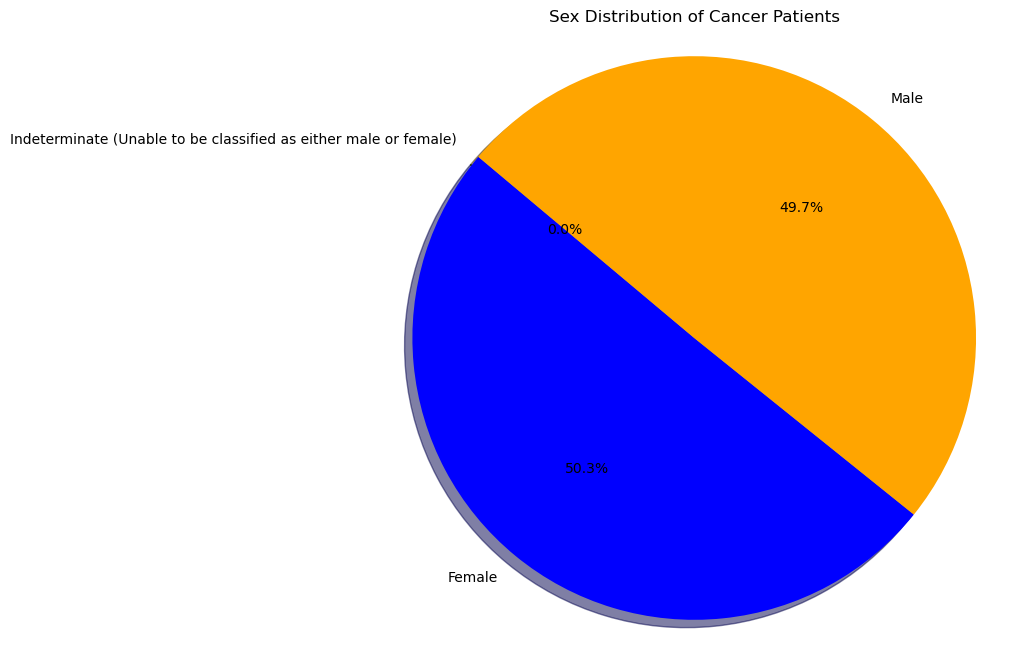

In [35]:
# Setting the figure size
plt.figure(figsize=(8, 8))

# Counting the distribution of gender using value_counts()
b_gender_counts = unique_df['GENDER'].value_counts()

# Data for the pie chart
labels = b_gender_counts.index
sizes = b_gender_counts.values
colors = ['blue', 'orange', 'green']

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sex Distribution of Cancer Patients')
plt.show()


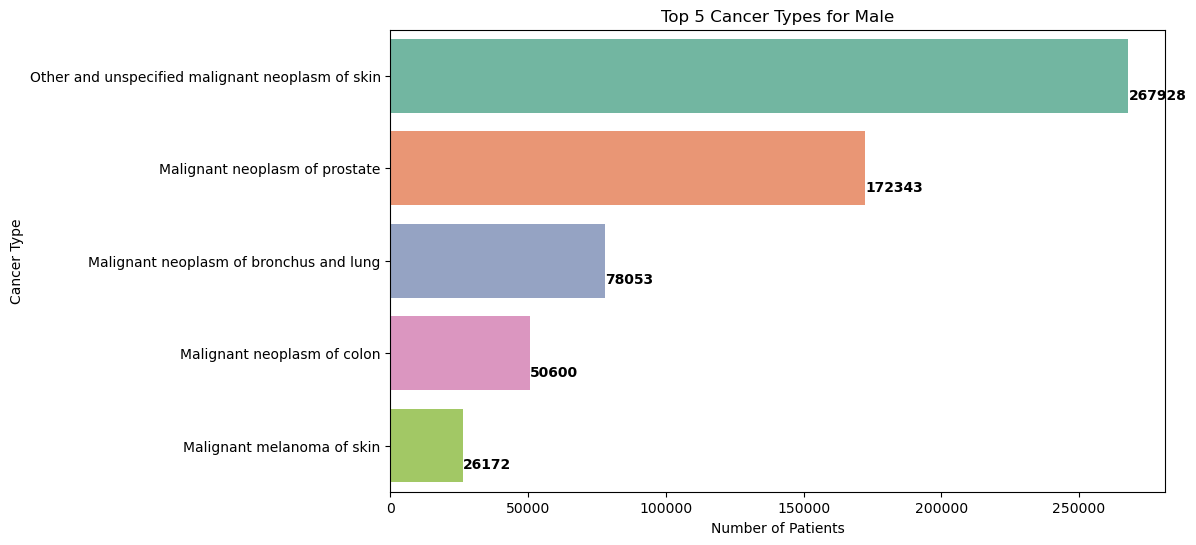

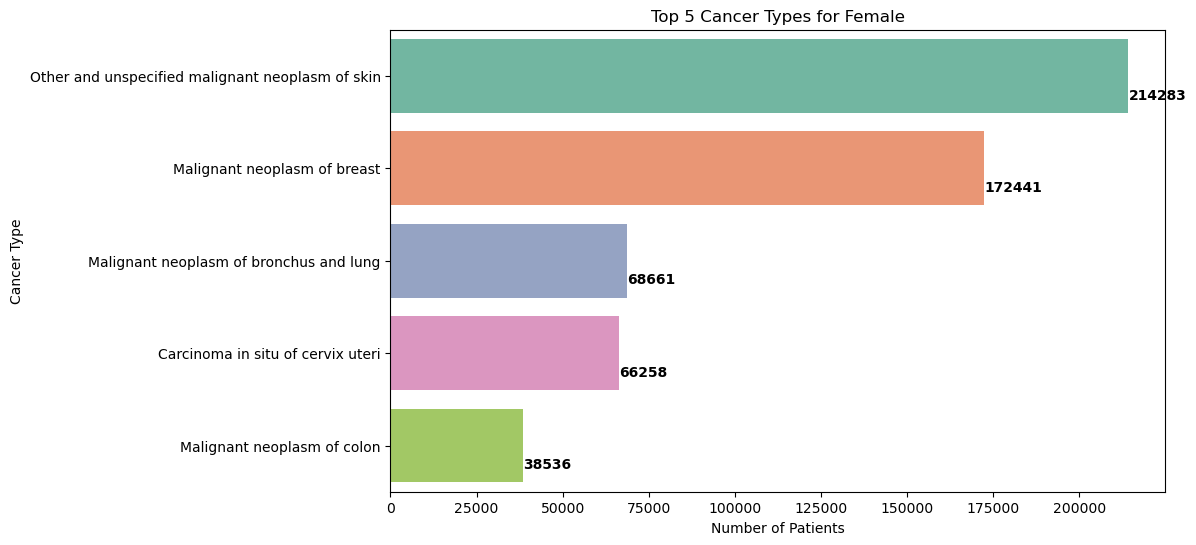

In [48]:
male_top_cancer_types = unique_df[unique_df['GENDER'] == 'Male']['SITE_ICD10_O2_3CHAR'].value_counts().nlargest(5)
female_top_cancer_types = unique_df[unique_df['GENDER'] == 'Female']['SITE_ICD10_O2_3CHAR'].value_counts().nlargest(5)

# Filter the dataframe for the top 5 cancer types
male_filtered_df = unique_df[(unique_df['GENDER'] == 'Male') & (unique_df['SITE_ICD10_O2_3CHAR'].isin(male_top_cancer_types.index))]
female_filtered_df = unique_df[(unique_df['GENDER'] == 'Female') & (unique_df['SITE_ICD10_O2_3CHAR'].isin(female_top_cancer_types.index))]

# Plot the top 5 cancer types for male
plt.figure(figsize=(10, 6))
male_plot = sns.countplot(y='SITE_ICD10_O2_3CHAR', data=male_filtered_df, palette='Set2', order=male_top_cancer_types.index)

# Add the count numbers for each bar
for i, v in enumerate(male_top_cancer_types):
    male_plot.text(v + 3, i + .25, str(v), color='black', fontweight='bold')

plt.title('Top 5 Cancer Types for Male')
plt.ylabel('Cancer Type')
plt.xlabel('Number of Patients')
plt.show()

# Plot the top 5 cancer types for female
plt.figure(figsize=(10, 6))
female_plot = sns.countplot(y='SITE_ICD10_O2_3CHAR', data=female_filtered_df, palette='Set2', order=female_top_cancer_types.index)

# Add the count numbers for each bar
for i, v in enumerate(female_top_cancer_types):
    female_plot.text(v + 3, i + .25, str(v), color='black', fontweight='bold')

plt.title('Top 5 Cancer Types for Female')
plt.ylabel('Cancer Type')
plt.xlabel('Number of Patients')
plt.show()

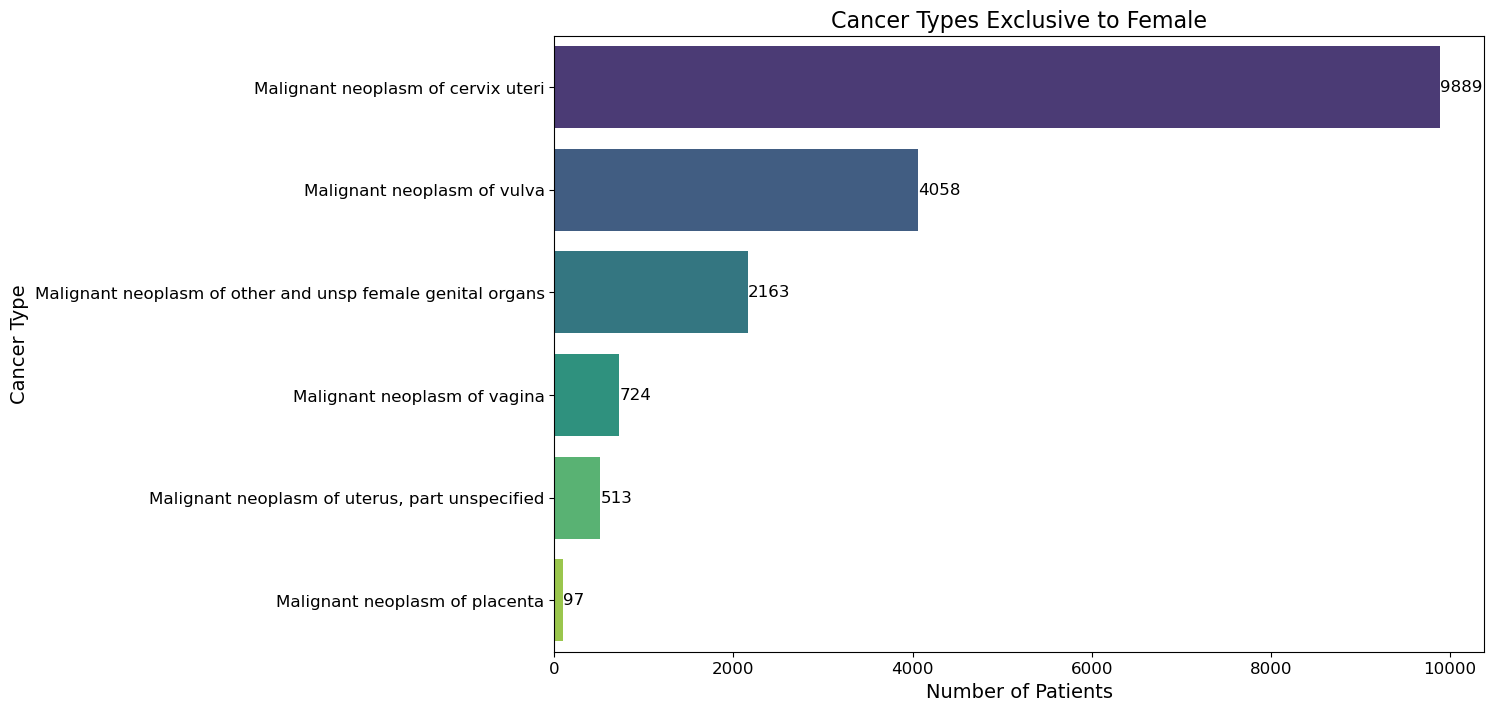

Cancer types exclusive to male: set()
Cancer types exclusive to female: {'Malignant neoplasm of cervix uteri', 'Malignant neoplasm of other and unsp female genital organs', 'Malignant neoplasm of uterus, part unspecified', 'Malignant neoplasm of vulva', 'Malignant neoplasm of vagina', 'Malignant neoplasm of placenta'}


In [49]:
# Get the unique cancer types for each gender
male_cancer_types = set(unique_df[unique_df['GENDER'] == 'Male']['SITE_ICD10_O2_3CHAR'].unique())
female_cancer_types = set(unique_df[unique_df['GENDER'] == 'Female']['SITE_ICD10_O2_3CHAR'].unique())

# Find the cancer types that are exclusive to each gender
male_only_cancer_types = male_cancer_types - female_cancer_types
female_only_cancer_types = female_cancer_types - male_cancer_types

# Filter the dataframe for the exclusive cancer types
male_only_df = unique_df[(unique_df['GENDER'] == 'Male') & (unique_df['SITE_ICD10_O2_3CHAR'].isin(male_only_cancer_types))]
female_only_df = unique_df[(unique_df['GENDER'] == 'Female') & (unique_df['SITE_ICD10_O2_3CHAR'].isin(female_only_cancer_types))]

# Count the number of patients for each exclusive cancer type
male_only_counts = male_only_df['SITE_ICD10_O2_3CHAR'].value_counts()
female_only_counts = female_only_df['SITE_ICD10_O2_3CHAR'].value_counts()

# Create bar plots for the exclusive cancer types with enhanced visuals
def create_stunning_bar_plot(counts, title):
    plt.figure(figsize=(12, 8))
    sns.barplot(y=counts.index, x=counts.values, palette='viridis')
    plt.title(title, fontsize=16)
    plt.ylabel('Cancer Type', fontsize=14)
    plt.xlabel('Number of Patients', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    for index, value in enumerate(counts.values):
        plt.text(value + 2, index, str(value), fontsize=12, verticalalignment='center')
    plt.show()

if not male_only_counts.empty:
    create_stunning_bar_plot(male_only_counts, 'Cancer Types Exclusive to Male')

if not female_only_counts.empty:
    create_stunning_bar_plot(female_only_counts, 'Cancer Types Exclusive to Female')

print('Cancer types exclusive to male:', male_only_cancer_types)
print('Cancer types exclusive to female:', female_only_cancer_types)

In [51]:
# Group the data by year and gender and count the number of diagnoses
diagnoses_counts = unique_df.groupby(['DIAGNOSISYEAR', 'GENDER']).size().reset_index(name='Counts')
diagnoses_counts

,DIAGNOSISYEAR,GENDER,Counts
0,2016,Female,240923
1,2016,Indeterminate (Unable to be classified as eith...,1
2,2016,Male,235809
3,2017,Female,235218
4,2017,Male,230297
5,2018,Female,234757
6,2018,Male,235247
7,2019,Female,231167
8,2019,Indeterminate (Unable to be classified as eith...,1
9,2019,Male,228185


<Figure size 1200x800 with 0 Axes>

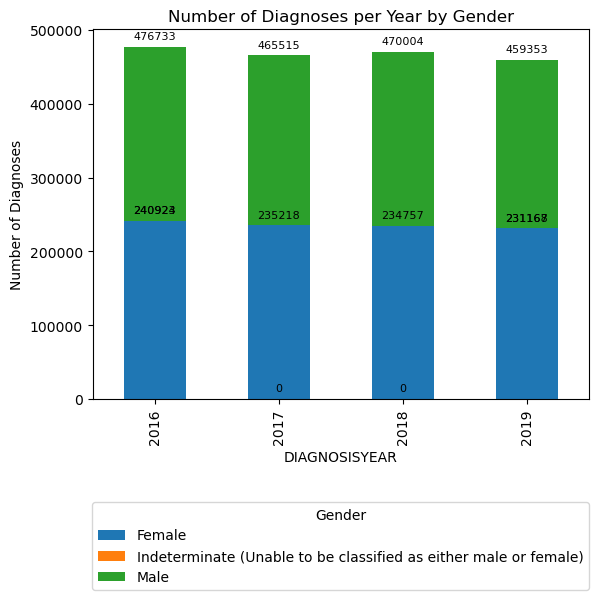

In [52]:


# Pivot the data for plotting
diagnoses_counts_pivot = diagnoses_counts.pivot(index='DIAGNOSISYEAR', columns='GENDER', values='Counts')

# Plot a stacked bar chart with improved figure size and added data values
plt.figure(figsize=(12, 8))
ax = diagnoses_counts_pivot.plot(kind='bar', stacked=True)
plt.title('Number of Diagnoses per Year by Gender')
plt.xlabel('DIAGNOSISYEAR')
plt.ylabel('Number of Diagnoses')

# Add data values on top of the bars
for container in ax.containers:
    plt.gca().bar_label(container, label_type='edge', fontsize=8, color='black', padding=4)

# Move legend below the figure
ax.legend(title='Gender', bbox_to_anchor=(0.5, -0.26), loc='upper center')


plt.show()


In [53]:
# Calculate statistics for each gender
stats_by_gender = unique_df.groupby('GENDER')['AGE'].agg(['mean', 'median', 'min', 'max', lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 75)]).reset_index()
stats_by_gender.columns = ['GENDER', 'Mean Age', 'Median Age', 'Min Age', 'Max Age', '25th Percentile', '75th Percentile']

print('Statistics by Gender:')
stats_by_gender


Statistics by Gender:


,GENDER,Mean Age,Median Age,Min Age,Max Age,25th Percentile,75th Percentile
0,Female,64.828509,68.0,0,105,54.00,78.00
1,Indeterminate (Unable to be classified as eith...,85.500000,85.5,81,90,83.25,87.75
2,Male,68.964984,71.0,0,105,61.00,79.00


In [54]:
# Filter the DataFrame to select patients aged below 5
patients_below_5 = unique_df[unique_df['AGE'] < 5]

# Display the data of patients aged below 5

patients_below_5.shape


(3060, 50)

In [55]:
#top 5 cancer types for patients aged below 5

# Group by cancer type and count occurrences for each type

cancer_type_occurrence_counts = patients_below_5['SITE_ICD10_O2_3CHAR'].value_counts().reset_index()
cancer_type_occurrence_counts.columns = ['CANCER_TYPE', 'OCCURRENCES']

# Find the top 5 cancer types with the highest occurrence rates
top_5_occurrence_cancer_types = cancer_type_occurrence_counts.nlargest(5, 'OCCURRENCES')

top_5_occurrence_cancer_types



,CANCER_TYPE,OCCURRENCES
0,Lymphoid leukemia,742
1,Malignant neoplasm of brain,428
2,"Malignant neoplasm of kidney, except renal pelvis",339
3,Malignant neoplasm of thyroid gland,163
4,Malignant neoplasm of eye and adnexa,160


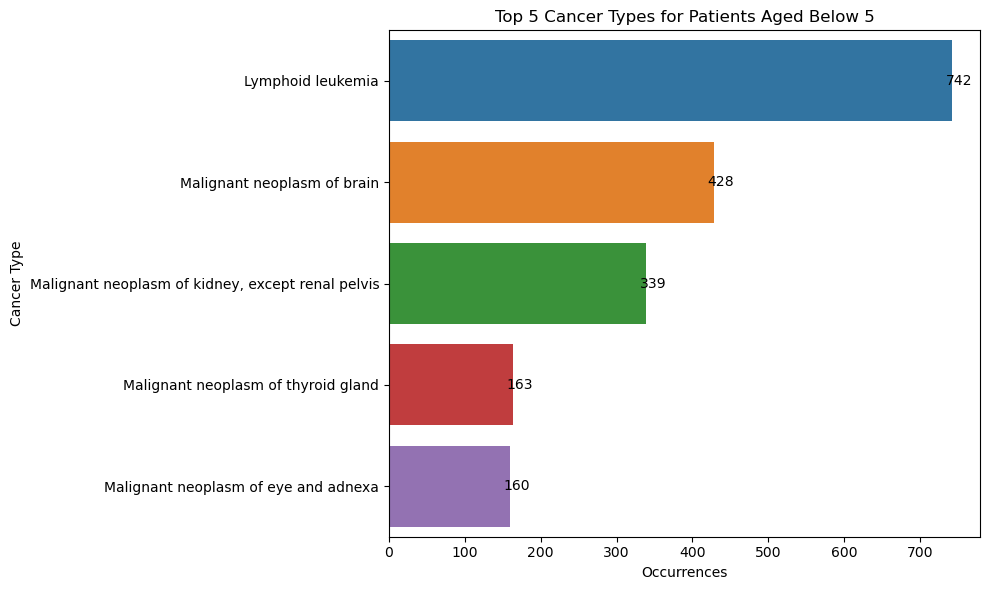

In [57]:

plt.figure(figsize=(10, 6))
plot = sns.barplot(x='OCCURRENCES', y='CANCER_TYPE', data=top_5_occurrence_cancer_types)
plt.xlabel('Occurrences')
plt.ylabel('Cancer Type')
plt.title('Top 5 Cancer Types for Patients Aged Below 5')

# Display values on the bars
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width(), p.get_y() + p.get_height() / 2),
                  ha = 'center', va = 'center',
                  xytext = (5, 0),
                  textcoords = 'offset points')

# Show the plot
plt.tight_layout()
plt.show()


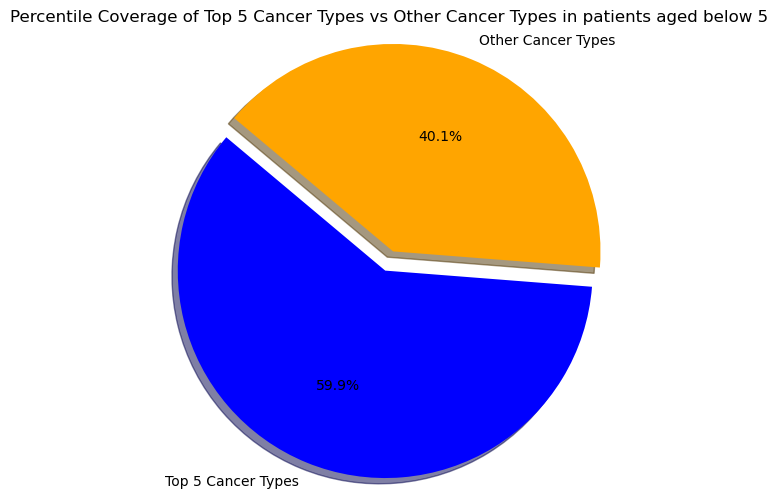

In [58]:
# Calculate total occurrences of the top 5 cancer types
total_top_5_occurrences = top_5_occurrence_cancer_types['OCCURRENCES'].sum()

# Calculate total occurrences of all cancer types
total_all_occurrences = cancer_type_occurrence_counts['OCCURRENCES'].sum()

# Calculate the percentile coverage of the top 5 cancer types
percentile_coverage_top_5 = (total_top_5_occurrences / total_all_occurrences) * 100

# Calculate the percentile coverage of other cancer types
percentile_coverage_other = 100 - percentile_coverage_top_5

# Data for the pie chart
labels = ['Top 5 Cancer Types', 'Other Cancer Types']
sizes = [percentile_coverage_top_5, percentile_coverage_other]
colors = ['blue', 'orange']
explode = (0.1, 0)  # Explode the first slice (Top 5)

# Create a pie chart 
plt.figure(figsize=(6, 6), facecolor='white')  # Set white background
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True, textprops={'color': 'black'})  # Add shadow and set label color to black
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentile Coverage of Top 5 Cancer Types vs Other Cancer Types in patients aged below 5', color='black')
plt.show()


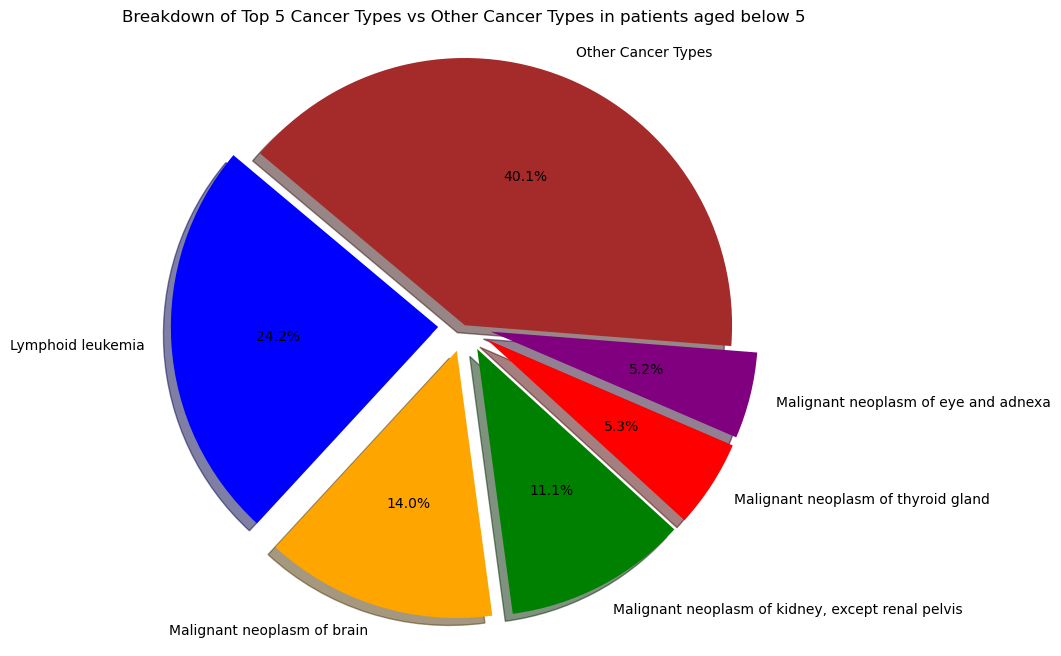

In [59]:
# Data for the pie chart
labels = top_5_occurrence_cancer_types['CANCER_TYPE'].tolist() + ['Other Cancer Types']
sizes = top_5_occurrence_cancer_types['OCCURRENCES'].tolist() + [total_all_occurrences - total_top_5_occurrences]
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0)  # Explode the first slice (Top 5) for emphasis

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Breakdown of Top 5 Cancer Types vs Other Cancer Types in patients aged below 5')
plt.show()


In [60]:
# Filter the DataFrame to select patients aged 0
patients_aged_0 = patients_below_5[patients_below_5['AGE'] == 0]

patients_aged_0.shape

(699, 50)

In [62]:
df2_unique= df2.drop_duplicates(subset='PATIENTID')

In [71]:
unique_df['CANCERCODE'] = df2_unique['SITE_ICD10_O2_3CHAR']
unique_df['STATUS'] = df2_unique['VITALSTATUS']

C:\Users\adbsa\AppData\Local\Temp\ipykernel_14156\3207636965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df['CANCERCODE'] = df2_unique['SITE_ICD10_O2_3CHAR']
C:\Users\adbsa\AppData\Local\Temp\ipykernel_14156\3207636965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df['STATUS'] = df2_unique['VITALSTATUS']


In [64]:
unique_df.head()

,TUMOURID,GENDER,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,SITE_ICD10_O2,SITE_ICD10R4_O2_3CHAR_FROM2013,SITE_ICD10R4_O2_FROM2013,SITE_ICDO3REV2011,SITE_ICDO3REV2011_3CHAR,...,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,VITALSTATUS,VITALSTATUSDATE,LINKNUMBER,AGE_INTERVAL,DIAGNOSISYEAR,VITALYEAR,CANCERCODE
0,10399610,Male,10000001,2017-03-31,Other and unspecified malignant neoplasm of skin,Other and unsp malignant neoplasm of skin of s...,Other and unspecified malignant neoplasm of skin,Other and unsp malignant neoplasm of skin of s...,Other and unsp malignant neoplasm of skin of s...,Other and unspecified malignant neoplasm of skin,...,NaN,NaN,NaN,Alive,2022-07-05,101610884,75-79,2017,2022,C44
1,10694862,Male,10000002,2016-01-14,Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...","Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,...,NaN,NaN,NaN,Alive,2022-07-05,101343783,60-64,2016,2022,C44
2,11938715,Female,10000003,2018-12-10,Other and unspecified malignant neoplasm of skin,Oth and unsp malig neoplasm skin/ ear and extr...,Other and unspecified malignant neoplasm of skin,Oth and unsp malig neoplasm skin/ ear and extr...,Oth and unsp malig neoplasm skin/ ear and extr...,Other and unspecified malignant neoplasm of skin,...,NaN,NaN,NaN,Alive,2022-07-05,101560124,70-74,2018,2022,C44
3,11869010,Male,10000004,2018-04-05,Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,"Other and unsp malignant neoplasm of skin, uns...","Other and unsp malignant neoplasm of skin, uns...",Other and unspecified malignant neoplasm of skin,...,NaN,NaN,NaN,Alive,2022-07-05,101833580,70-74,2018,2022,C44
4,11037077,Male,10000005,2018-04-23,Other and unspecified malignant neoplasm of skin,"Oth and unsp malig neoplasm skin/ upper limb, ...",Other and unspecified malignant neoplasm of skin,"Oth and unsp malig neoplasm skin/ upper limb, ...","Oth and unsp malig neoplasm skin/ upper limb, ...",Other and unspecified malignant neoplasm of skin,...,NaN,NaN,NaN,Alive,2022-07-05,100957799,45-49,2018,2022,C44


In [72]:
lung_cancer_df = unique_df[unique_df['CANCERCODE'] == 'C34']
lung_cancer_df.shape

(146714, 52)

In [74]:
lung_cancer_df.head()

,TUMOURID,GENDER,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,SITE_ICD10_O2,SITE_ICD10R4_O2_3CHAR_FROM2013,SITE_ICD10R4_O2_FROM2013,SITE_ICDO3REV2011,SITE_ICDO3REV2011_3CHAR,...,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,VITALSTATUS,VITALSTATUSDATE,LINKNUMBER,AGE_INTERVAL,DIAGNOSISYEAR,VITALYEAR,CANCERCODE,STATUS
1306084,11918598,Male,60000001,2016-02-10,Malignant neoplasm of bronchus and lung,"Malignant neoplasm of lower lobe, bronchus or ...",Malignant neoplasm of bronchus and lung,"Malignant neoplasm of lower lobe, bronchus or ...","Malignant neoplasm of lower lobe, bronchus or ...",Malignant neoplasm of bronchus and lung,...,Chronic obstructive pulmon disease w acute low...,1,Dead,2016-03-10,100939519,65-69,2016,2016,C34,D
1306085,11315746,Male,60000002,2018-08-31,Malignant neoplasm of bronchus and lung,"Malignant neoplasm of middle lobe, bronchus or...",Malignant neoplasm of bronchus and lung,"Malignant neoplasm of middle lobe, bronchus or...","Malignant neoplasm of middle lobe, bronchus or...",Malignant neoplasm of bronchus and lung,...,Malignant neoplasm of unspecified part of bron...,4,Dead,2018-10-19,101621005,65-69,2018,2018,C34,D
1306086,10496707,Female,60000003,2017-03-24,Malignant neoplasm of bronchus and lung,"Malignant neoplasm of upper lobe, bronchus or ...",Malignant neoplasm of bronchus and lung,"Malignant neoplasm of upper lobe, bronchus or ...","Malignant neoplasm of upper lobe, bronchus or ...",Malignant neoplasm of bronchus and lung,...,Malignant neoplasm of unspecified part of bron...,4,Dead,2018-02-17,100332651,45-49,2017,2018,C34,D
1306087,10849834,Female,60000004,2018-07-31,Malignant neoplasm of bronchus and lung,"Malignant neoplasm of lower lobe, bronchus or ...",Malignant neoplasm of bronchus and lung,"Malignant neoplasm of lower lobe, bronchus or ...","Malignant neoplasm of lower lobe, bronchus or ...",Malignant neoplasm of bronchus and lung,...,NaN,NaN,Dead,2019-01-03,101823356,60-64,2018,2019,C34,D
1306088,10088791,Female,60000005,2019-03-06,Malignant neoplasm of bronchus and lung,"Malignant neoplasm of lower lobe, bronchus or ...",Malignant neoplasm of bronchus and lung,"Malignant neoplasm of lower lobe, bronchus or ...","Malignant neoplasm of lower lobe, bronchus or ...",Malignant neoplasm of bronchus and lung,...,NaN,NaN,Alive,2022-07-05,101309843,60-64,2019,2022,C34,A


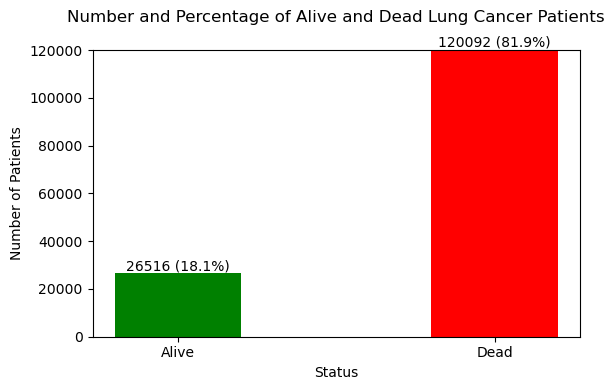

In [75]:
# Counting the number of lung cancer patients that are still alive
alive_statuses = ['A', 'A1', 'A2', 'A3']  # Alive status codes
dead_statuses = ['D', 'D1', 'D2', 'D3', 'D4', 'D5']  # Dead status codes

alive_lungpatients = lung_cancer_df[lung_cancer_df['STATUS'].isin(alive_statuses)].shape[0]
dead_lungpatients = lung_cancer_df[lung_cancer_df['STATUS'].isin(dead_statuses)].shape[0]

# Calculate the total number of patients
total_patients = alive_lungpatients + dead_lungpatients

# Calculate the percentages
alive_percentage = (alive_lungpatients / total_patients) * 100
dead_percentage = (dead_lungpatients / total_patients) * 100

# Data for the bar plot
categories = ['Alive', 'Dead']
values = [alive_lungpatients, dead_lungpatients]  # Number of patients
percentages = [alive_percentage, dead_percentage]  # Percentages

# Create a small bar plot with smaller bar widths
plt.figure(figsize=(6, 4), facecolor='white')  # Set white background
bars = plt.bar(categories, values, color=['green', 'red'], width=0.4)

# Add number values on top of the bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{values[i]} ({percentages[i]:.1f}%)', ha='center', va='bottom', fontsize=10, color='black')

plt.title('Number and Percentage of Alive and Dead Lung Cancer Patients', pad=20)  # Move title up
plt.xlabel('Status')
plt.ylabel('Number of Patients')
plt.ylim(0, max(values) + 10)  # Set y-axis limits

plt.tight_layout() 
plt.show()


In [82]:
lung_cancer_2016_df = lung_cancer_df[lung_cancer_df['DIAGNOSISYEAR'] == 2016]

lung_dead_in_2016 = lung_cancer_2016_df[lung_cancer_2016_df['STATUS'].isin(dead_statuses)]

total_lung_dead = lung_cancer_df[lung_cancer_df['STATUS'].isin(dead_statuses)]

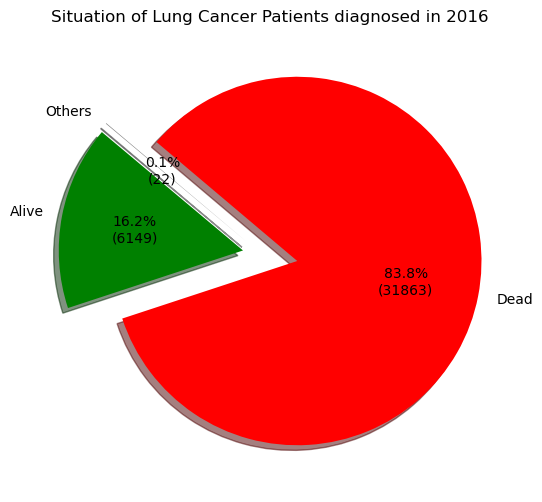

In [83]:
patient_status_counts = lung_cancer_2016_df['STATUS'].value_counts()

other_count = patient_status_counts.sum() - sum(patient_status_counts.get(status, 0) for status in alive_statuses + dead_statuses)

# Count the different alive and dead statuses
alive_count = sum(patient_status_counts.get(status, 0) for status in alive_statuses)
dead_count = sum(patient_status_counts.get(status, 0) for status in dead_statuses)

# Data for the pie chart
labels = ['Alive', 'Dead', 'Others']
sizes = [alive_count, dead_count, other_count]
colors = ['green', 'red', 'gray']
explode = (0.1, 0.2, 0.1)  # Explode the 'Alive' slice for emphasis

# Create a pie chart
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)

# Add values to the wedges and percentages to the autopct
for wedge, autotext in zip(wedges, autotexts):
    percentage = autotext.get_text()
    count = int(sizes[autotexts.index(autotext)])
    autotext.set_text(f'{percentage}\n({count})')

plt.title('Situation of Lung Cancer Patients diagnosed in 2016')
plt.axis('equal') 
plt.show()


In [84]:
# Calculate survival time in days for lung patients diagnosed in 2016
lung_dead_in_2016['survival_time'] = (lung_dead_in_2016['VITALSTATUSDATE'] - lung_dead_in_2016['DIAGNOSISDATEBEST']).dt.days

# Calculate mean survival time
mean_survival_time = lung_dead_in_2016['survival_time'].mean()
mean_survival_time

C:\Users\adbsa\AppData\Local\Temp\ipykernel_14156\4251125997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lung_dead_in_2016['survival_time'] = (lung_dead_in_2016['VITALSTATUSDATE'] - lung_dead_in_2016['DIAGNOSISDATEBEST']).dt.days


407.6779570567554

In [86]:
dead_df = unique_df[unique_df['STATUS'].isin(dead_statuses)]
dead_df.shape

(636229, 52)

C:\Users\adbsa\AppData\Local\Temp\ipykernel_14156\4211230973.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  most_deadly_cancer_df = most_deadly_cancer_df.append({'Cancer Type': 'Other', 'Number of Deaths': total_other_deaths, 'Percentage': (total_other_deaths / total_deaths) * 100}, ignore_index=True)


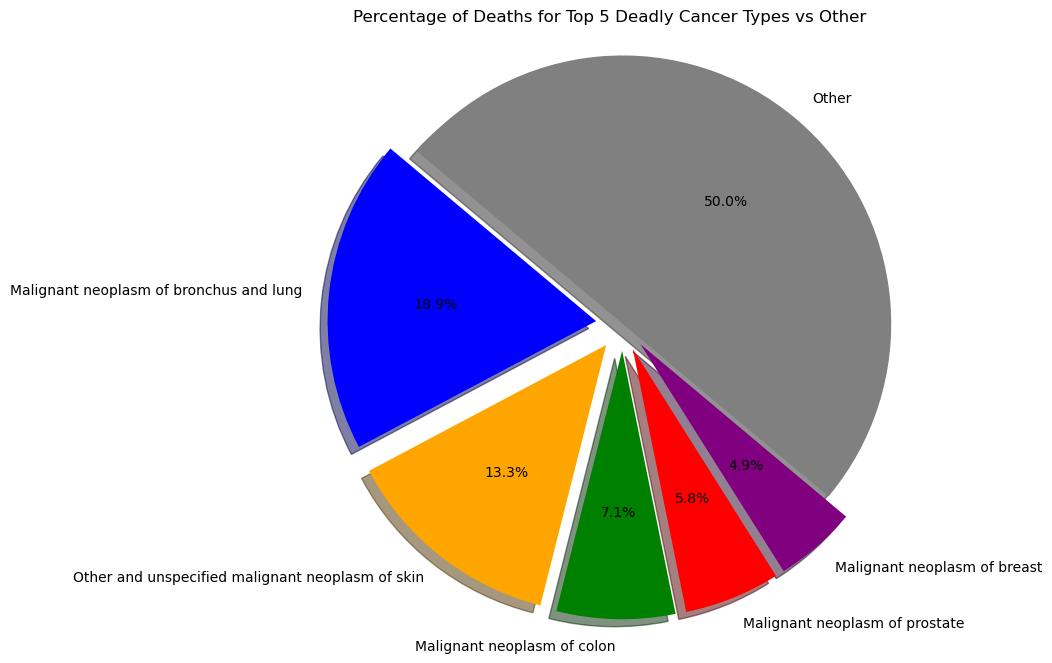

In [87]:
cancer_death_counts = dead_df['SITE_ICD10_O2_3CHAR'].value_counts()

most_deadly_cancer = cancer_death_counts.nlargest(5)

# Create a DataFrame with the desired column names
most_deadly_cancer_df = pd.DataFrame({'Cancer Type': most_deadly_cancer.index, 'Number of Deaths': most_deadly_cancer.values})

most_deadly_cancer_df

# Calculate the total number of deaths
total_deaths = most_deadly_cancer_df['Number of Deaths'].sum()

# Calculate the percentage of deaths for each cancer type
most_deadly_cancer_df['Percentage'] = (most_deadly_cancer_df['Number of Deaths'] / total_deaths) * 100

# Combine all other categories into 'Other'
other_deaths = len(cancer_death_counts) - len(most_deadly_cancer_df)
total_other_deaths = cancer_death_counts.sum() - total_deaths
most_deadly_cancer_df = most_deadly_cancer_df.append({'Cancer Type': 'Other', 'Number of Deaths': total_other_deaths, 'Percentage': (total_other_deaths / total_deaths) * 100}, ignore_index=True)

# Data for the pie chart
labels = most_deadly_cancer_df['Cancer Type']
sizes = most_deadly_cancer_df['Percentage']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'gray']  # Add colors for the top 5 types and 'Other'
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0)  # Explode the first slice (Top 5) for emphasis

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Deaths for Top 5 Deadly Cancer Types vs Other')
plt.show()


In [88]:
most_deadly_cancer_df


,Cancer Type,Number of Deaths,Percentage
0,Malignant neoplasm of bronchus and lung,120092,37.747093
1,Other and unspecified malignant neoplasm of skin,84576,26.583770
2,Malignant neoplasm of colon,45378,14.263128
3,Malignant neoplasm of prostate,36692,11.532961
4,Malignant neoplasm of breast,31411,9.873047
5,Other,318080,99.978312


In [90]:
columns_to_select = ['TUMOURID', 'GENDER', 'PATIENTID', 'DIAGNOSISDATEBEST',
       'SITE_ICD10_O2_3CHAR', 'GRADE', 'AGE',
       'DATE_FIRST_SURGERY',
       'ETHNICITY', 'DEATHCAUSECODE_UNDERLYING',
       'DEATHLOCATIONCODE', 'STATUS', 'VITALSTATUSDATE',
       'DIAGNOSISYEAR', 'VITALYEAR', 'CANCERCODE']
lung_dead_patients = total_lung_dead[columns_to_select]
lung_dead_patients

,TUMOURID,GENDER,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,GRADE,AGE,DATE_FIRST_SURGERY,ETHNICITY,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,STATUS,VITALSTATUSDATE,DIAGNOSISYEAR,VITALYEAR,CANCERCODE
1306084,11918598,Male,60000001,2016-02-10,Malignant neoplasm of bronchus and lung,GX,70,2016-03-25,WHITE BRITISH,Chronic obstructive pulmon disease w acute low...,1,D,2016-03-10,2016,2016,C34
1306085,11315746,Male,60000002,2018-08-31,Malignant neoplasm of bronchus and lung,G3,70,NaN,WHITE BRITISH,Malignant neoplasm of unspecified part of bron...,4,D,2018-10-19,2018,2018,C34
1306086,10496707,Female,60000003,2017-03-24,Malignant neoplasm of bronchus and lung,GX,52,NaN,WHITE BRITISH,Malignant neoplasm of unspecified part of bron...,4,D,2018-02-17,2017,2018,C34
1306087,10849834,Female,60000004,2018-07-31,Malignant neoplasm of bronchus and lung,GX,67,NaN,WHITE BRITISH,NaN,NaN,D,2019-01-03,2018,2019,C34
1306089,11641077,Female,60000006,2018-08-01,Malignant neoplasm of bronchus and lung,G3,66,NaN,C ANY OTHER WHITE BACKGROUND,Malignant neoplasm of unspecified part of bron...,4,D,2021-01-05,2018,2021,C34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730903,10891116,Male,100045990,2019-04-30,Malignant neoplasm of bronchus and lung,GX,75,2019-04-30,WHITE BRITISH,Malignant neoplasm of unspecified part of bron...,4,D,2022-10-01,2019,2022,C34
1730904,11948297,Female,100045991,2016-10-21,Malignant neoplasm of bronchus and lung,GX,71,NaN,NOT STATED,Malignant neoplasm of unspecified part of bron...,2,D,2020-10-21,2016,2020,C34
1730905,11521403,Female,100045992,2018-05-14,Malignant neoplasm of bronchus and lung,GX,70,NaN,WHITE BRITISH,Malignant neoplasm of unspecified part of bron...,4,D,2021-11-09,2018,2021,C34
1730906,11435990,Female,100045993,2019-03-08,Malignant neoplasm of bronchus and lung,G3,51,2019-03-08,WHITE BRITISH,Malignant neoplasm of unspecified part of bron...,1,D,2021-03-20,2019,2021,C34


In [91]:
# Calculate survival time in days
lung_dead_patients['survival_time'] = (lung_dead_patients['VITALSTATUSDATE'] - lung_dead_patients['DIAGNOSISDATEBEST']).dt.days

# Calculate survival percentiles
survival_percentiles = lung_dead_patients['survival_time'].quantile([0.25, 0.5, 0.75]).reset_index()

# Rename the columns
survival_percentiles.columns = ['Percentile', 'Survival Days']

# Print survival percentiles
print('Survival Percentiles:')
survival_percentiles


Survival Percentiles:


C:\Users\adbsa\AppData\Local\Temp\ipykernel_14156\1419409855.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lung_dead_patients['survival_time'] = (lung_dead_patients['VITALSTATUSDATE'] - lung_dead_patients['DIAGNOSISDATEBEST']).dt.days


,Percentile,Survival Days
0,0.25,42.0
1,0.50,152.0
2,0.75,453.0


In [ ]:
#This means that 25% of the dead lung cancer patients survived for 42 days or less after diagnosis, 
#50% survived for 152 days or less, and 75% survived for 451 days or less.

In [92]:
#survival curve for patients diagnosed in 2016
bdf_2016 = unique_df[unique_df['DIAGNOSISYEAR'] == 2016]
from lifelines import KaplanMeierFitter

C:\Users\adbsa\AppData\Local\Temp\ipykernel_14156\1456682320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bdf_2016['VITALSTATUS'] = bdf_2016['VITALSTATUS'].apply(lambda x: 1 if x.startswith('D') else 0)
C:\Users\adbsa\AppData\Local\Temp\ipykernel_14156\1456682320.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bdf_2016['DIAGNOSISDATEBEST'] = pd.to_datetime(bdf_2016['DIAGNOSISDATEBEST'])
C:\Users\adbsa\AppData\Local\Temp\ipykernel_14156\1456682320.py:7: SettingWithCopyWarning: 
A value is trying t

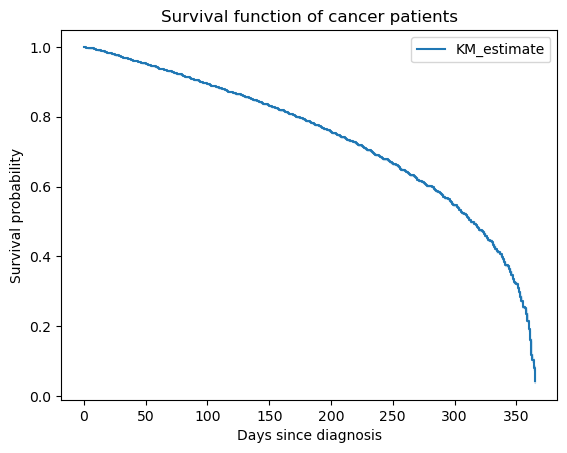

In [93]:
bdf_2016['VITALSTATUS'] = bdf_2016['VITALSTATUS'].apply(lambda x: 1 if x.startswith('D') else 0)

# Convert 'DIAGNOSISDATEBEST' to datetime format
bdf_2016['DIAGNOSISDATEBEST'] = pd.to_datetime(bdf_2016['DIAGNOSISDATEBEST'])

# Calculate the duration from diagnosis date to the end of 2016
bdf_2016['DURATION'] = (pd.to_datetime('2016-12-31') - bdf_2016['DIAGNOSISDATEBEST']).dt.days

# Create a Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Fit the data into the model
kmf.fit(bdf_2016['DURATION'], bdf_2016['VITALSTATUS'])

# Plot the survival function
kmf.plot()
plt.title('Survival function of cancer patients')
plt.xlabel('Days since diagnosis')
plt.ylabel('Survival probability')
plt.show()

In [ ]:
#This means probablity of survival after 350 days is minimal

In [94]:
# Group the data by 'ETHNICITY' and calculate the mean of the 'AGE' column
ethnicity_cancer_age = unique_df.groupby('ETHNICITY')['AGE'].mean().reset_index()

# Rename the columns for clarity
ethnicity_cancer_age.columns = ['Ethnicity', 'Average Age Of Patients']

# Print the dataframe
ethnicity_cancer_age

,Ethnicity,Average Age Of Patients
0,8 OTHER,56.333333
1,ASIAN BANGLADESHI,65.462618
2,ASIAN INDIAN,65.159803
3,ASIAN PAKISTANI,65.047344
4,BLACK AFRICAN,65.097314
5,BLACK CARIBBEAN,66.143602
6,C ANY OTHER WHITE BACKGROUND,65.401479
7,CHINESE,63.947188
8,English,65.000000
9,G ANY OTHER MIXED BACKGROUND,64.590174


C:\Users\adbsa\AppData\Local\Temp\ipykernel_14156\356457863.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x='Average Age Of Patients', y='Ethnicity', data=ethnicity_cancer_age, ci=None, palette=color_palette)


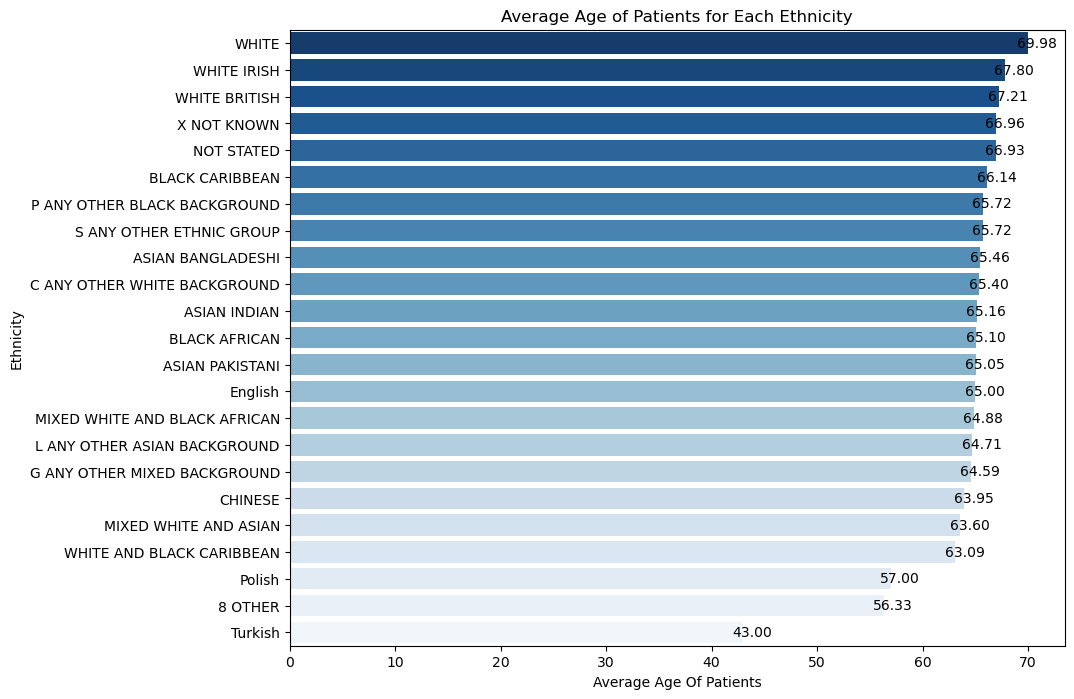

,Ethnicity,Average Age Of Patients
18,WHITE,69.976744
21,WHITE IRISH,67.796857
20,WHITE BRITISH,67.211596
22,X NOT KNOWN,66.964488
13,NOT STATED,66.927562
5,BLACK CARIBBEAN,66.143602
14,P ANY OTHER BLACK BACKGROUND,65.719754
16,S ANY OTHER ETHNIC GROUP,65.716504
1,ASIAN BANGLADESHI,65.462618
6,C ANY OTHER WHITE BACKGROUND,65.401479


In [95]:
# Sort the results in descending order
ethnicity_cancer_age = ethnicity_cancer_age.sort_values('Average Age Of Patients', ascending=False)

# Set a custom color palette with reversed order
color_palette = sns.color_palette("Blues_r", len(ethnicity_cancer_age))

# Create a bar plot with the custom color palette
plt.figure(figsize=(10, 8))
barplot = sns.barplot(x='Average Age Of Patients', y='Ethnicity', data=ethnicity_cancer_age, ci=None, palette=color_palette)

# Add value labels to each bar
for p in barplot.patches:
    width = p.get_width()
    plt.text(width - 1, p.get_y() + p.get_height() / 2, '{:1.2f}'.format(width), ha='left', va='center')

plt.title('Average Age of Patients for Each Ethnicity')
plt.show()

# Print the dataframe
ethnicity_cancer_age


In [99]:
unique_df[unique_df['ETHNICITY'] == 'Turkish']

,TUMOURID,GENDER,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,SITE_ICD10_O2,SITE_ICD10R4_O2_3CHAR_FROM2013,SITE_ICD10R4_O2_FROM2013,SITE_ICDO3REV2011,SITE_ICDO3REV2011_3CHAR,...,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,VITALSTATUS,VITALSTATUSDATE,LINKNUMBER,AGE_INTERVAL,DIAGNOSISYEAR,VITALYEAR,CANCERCODE,STATUS
1938023,11906317,Female,170009085,2016-06-02,Benign neoplasm of meninges,Benign neoplasm of cerebral meninges,Benign neoplasm of meninges,Benign neoplasm of cerebral meninges,Malignant neoplasm of cerebral meninges,Malignant neoplasm of meninges,...,NaN,NaN,Alive,2022-07-05,100783026,40-44,2016,2022,D32,A


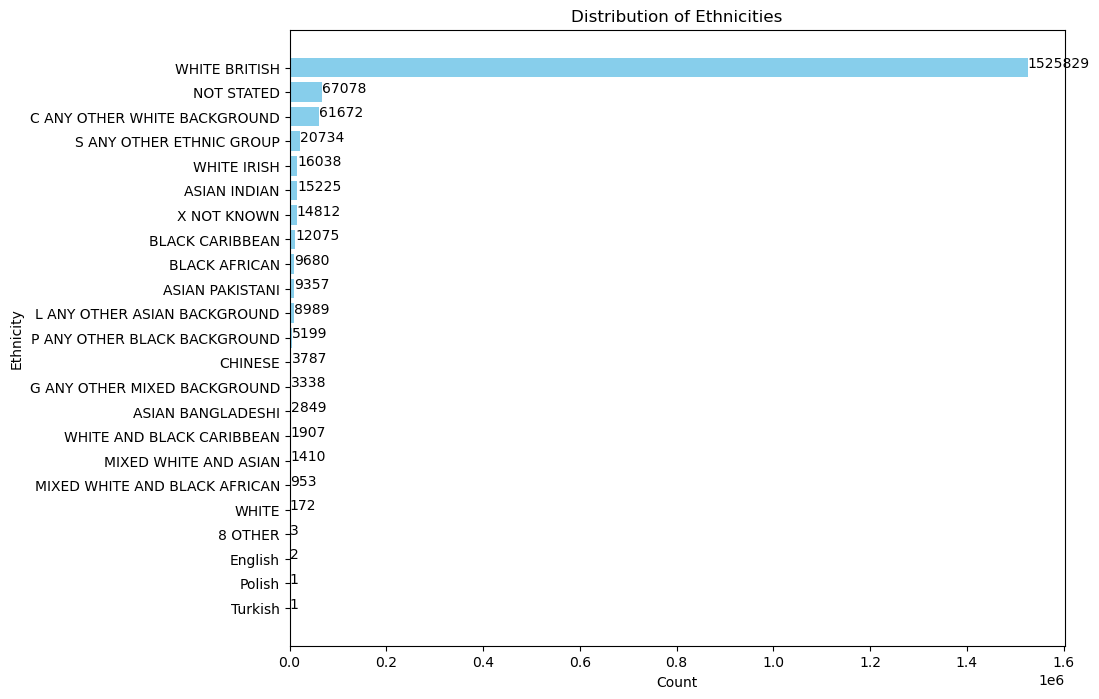

In [100]:
# Calculate the count of each unique ethnicity and sort it from lowest to highest
ethnicity_counts = unique_df['ETHNICITY'].value_counts().sort_values(ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(ethnicity_counts.index, ethnicity_counts.values, color='skyblue')

# Add value labels to each bar
for index, value in enumerate(ethnicity_counts.values):
    plt.text(value, index, str(value))

plt.xlabel('Count')
plt.ylabel('Ethnicity')
plt.title('Distribution of Ethnicities')
plt.show()

In [101]:
#more than 75% of UK population is white british.